In [1]:
# -- coding: UTF-8 --
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter, WeekdayLocator, \
    DayLocator, MONDAY, date2num, num2date
from matplotlib.finance import candlestick_ohlc
import datetime
import numpy as np
from numpy import genfromtxt
import pandas as pd
import time
from draw import *
from utils import *
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import os
from Analyze import *
from Pattern import *
import traceback
from MultiThread import *

C:\Users\user\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import pickle
data = pd.read_csv('TX00/TX00_50000.csv') #, encoding='utf-8')
items = [i for i in data]
time = data[items[0]]
infos = dict()
idx = []

sign = dict()
sign['up'] = data['Up-Down'][4][:2]
sign['down'] = data['Up-Down'][1][:2]
sign['K_up'] = data['9-K'][5][-2:]
sign['K_down'] = data['9-K'][0][-2:]

load_data = True
if load_data == True:
    days = Days()
    for i in range(50000):
        h, m = time[i].split(' ')[-1].split(':')[0], time[i].split(' ')[-1].split(':')[1]
        dt = time[i].split(' ')[0]
        if 8*60+45+80 <= int(h)*60+int(m) <= 8*60+45+170: #13*60+45: #13*60+45:
            idx += [i]
        else:
            continue
        d = process(data, i, sign)
        print i, d
        days.update(dt, d)


    with open('0917-infos_50000.pkl', 'wb') as output:
        pickle.dump(days, output, pickle.HIGHEST_PROTOCOL)
else:
    with open('0917-infos_50000.pkl', 'rb') as input:
        days = pickle.load(input)

130 (10820, 10823, 10820, 10823, 2, 127, 10820.8, 10818.5, 79.48, 67.04, 72.04)
131 (10823, 10824, 10821, 10821, -1, 333, 10819.6, 10817.3, 73.76, 60.81, -64.23)
132 (10820, 10823, 10819, 10822, 2, 225, 10819.2, 10816.3, 71.36, 54.34, 72.31)
133 (10819, 10821, 10818, 10820, 2, 291, 10818.2, 10815.8, 60.88, 45.83, 65.33)
134 (10818, 10819, 10817, 10818, 1, 135, 10817.0, 10816.1, 45.87, 38.31, 56.59)
135 (10819, 10819, 10816, 10817, -2, 91, 10816.2, 10816.5, 40.23, 34.53, -51.72)
136 (10816, 10819, 10816, 10819, 2, 210, 10815.0, 10816.7, 38.46, 31.69, 63.04)
137 (10813, 10817, 10813, 10817, 3, 188, 10813.4, 10817.0, 29.57, 28.3, 55.2)
138 (10814, 10814, 10813, 10814, 0, 109, 10813.4, 10817.2, 22.48, -27.66, 39.9)
139 (10811, 10814, 10810, 10814, 3, 338, 10815.2, 10817.6, 21.23, -30.26, 39.9)
140 (10811, 10813, 10811, 10811, 0, 448, 10816.8, 10818.1, -19.34, -34.77, 23.09)
141 (10816, 10818, 10811, 10811, -6, 1170, 10818.4, 10819.0, -29.01, -42.49, -23.09)
142 (10824, 10824, 10816, 10817,

1321 (10837, 10838, 10836, 10838, 2, 177, 10835.8, 10837.7, -45.69, -54.12, 62.95)
1322 (10835, 10836, 10834, 10836, 1, 275, 10836.0, 10837.2, -49.31, -58.33, 52.88)
1323 (10835, 10836, 10833, 10835, 0, 227, 10837.0, 10836.1, -57.29, -62.85, 47.13)
1324 (10835, 10836, 10833, 10835, 0, 598, 10838.8, 10835.0, -60.94, -65.63, 47.13)
1325 (10839, 10839, 10835, 10835, -4, 498, 10840.0, 10834.3, -66.41, -67.97, -47.13)
1326 (10841, 10843, 10838, 10839, -2, 517, 10839.6, 10833.5, -74.61, 68.75, -62.83)
1327 (10845, 10846, 10841, 10841, -3, 811, 10838.4, 10832.2, -77.82, 65.82, -72.49)
1328 (10841, 10845, 10840, 10844, 3, 1110, 10835.2, 10830.7, 78.1, 59.82, 88.9)
1329 (10835, 10841, 10834, 10841, 8, 1198, 10831.2, 10828.9, 69.53, 50.68, 86.44)
1330 (10833, 10837, 10831, 10833, 0, 1152, 10828.6, 10827.6, 54.29, 41.26, 74.34)
1331 (10825, 10833, 10824, 10833, 8, 459, 10827.4, 10827.0, 46.82, 34.74, 74.34)
1332 (10825, 10826, 10824, 10825, 1, 196, 10826.0, 10826.7, -20.23, -28.7, 40.18)
1333 (10

3550 (10716, 10716, 10713, 10713, -2, 300, 10711.0, 10709.7, 62.96, 49.71, -60.85)
3551 (10712, 10716, 10711, 10715, 3, 534, 10709.6, 10709.5, 59.45, 43.09, 72.51)
3552 (10708, 10712, 10707, 10712, 5, 294, 10708.4, 10708.7, 44.17, 34.9, 64.3)
3553 (10707, 10707, 10706, 10707, -1, 205, 10708.2, 10708.5, -23.4, -30.27, -40.67)
3554 (10706, 10708, 10706, 10708, 2, 131, 10708.4, 10708.8, 27.96, -33.71, 45.49)
3555 (10709, 10709, 10706, 10706, -3, 256, 10708.4, 10709.1, -27.65, -36.58, -32.74)
3556 (10710, 10711, 10708, 10709, -2, 107, 10709.4, 10709.7, -41.47, 41.05, -45.51)
3557 (10708, 10711, 10708, 10711, 3, 104, 10709.0, 10710.0, 43.46, 40.83, 57.45)
3558 (10709, 10709, 10707, 10708, 0, 202, 10708.8, 10710.1, -33.94, -39.52, 37.89)
3559 (10711, 10712, 10708, 10708, -3, 152, 10709.2, 10710.3, -38.41, -42.31, -37.89)
3560 (10707, 10713, 10706, 10711, 4, 331, 10709.8, 10710.4, 45.12, 44.26, 53.69)
3561 (10710, 10710, 10706, 10707, -3, 575, 10710.0, 10710.4, -36.43, -43.83, -16.59)
3562 (1

4735 (10695, 10698, 10692, 10695, 1, 506, 10691.4, 10691.0, 55.37, 39.69, 61.74)
4736 (10690, 10696, 10689, 10694, 3, 871, 10689.4, 10691.5, 42.43, 31.85, 58.73)
4737 (10688, 10691, 10687, 10691, 3, 348, 10688.0, 10692.1, 30.31, 26.55, 49.09)
4738 (10688, 10692, 10685, 10688, -1, 592, 10689.0, 10693.2, 22.97, -24.67, -37.4)
4739 (10685, 10690, 10682, 10689, 4, 983, 10689.6, 10694.4, 21.41, -25.52, 39.84)
4740 (10687, 10692, 10685, 10685, -2, 1159, 10690.6, 10695.4, -16.9, -27.58, -23.96)
4741 (10696, 10696, 10686, 10687, -9, 1108, 10693.6, 10696.8, -25.35, -32.91, -26.79)
4742 (10690, 10696, 10687, 10696, 5, 885, 10696.2, 10697.7, 35.4, -36.69, 46.58)
4743 (10694, 10695, 10688, 10691, -3, 1554, 10697.4, 10697.6, -28.1, -37.34, -20.48)
4744 (10700, 10700, 10694, 10694, -6, 427, 10699.2, 10698.7, -33.32, -41.96, -26.75)
4745 (10701, 10702, 10696, 10700, 0, 557, 10700.2, 10699.3, 49.98, 46.28, 52.46)
4746 (10702, 10705, 10697, 10700, -2, 747, 10700.0, 10699.2, 49.98, 44.43, -52.46)
4747 (

6970 (10825, 10829, 10822, 10828, 4, 652, 10828.0, 10832.0, 16.88, 14.76, 39.19)
6971 (10831, 10832, 10822, 10824, -8, 1326, 10827.8, 10833.9, -14.21, 13.7, -25.76)
6972 (10826, 10833, 10825, 10832, 5, 841, 10829.4, 10836.5, 17.61, 13.45, 39.83)
6973 (10829, 10832, 10827, 10827, -2, 699, 10829.2, 10838.4, -11.03, -11.37, -17.22)
6974 (10826, 10830, 10824, 10829, 2, 1319, 10832.2, 10841.0, 11.54, -11.55, 19.58)
6975 (10833, 10833, 10826, 10827, -5, 1041, 10836.0, 10843.0, -8.98, -11.55, -9.7)
6976 (10832, 10836, 10828, 10832, 1, 1483, 10840.0, 10845.6, 11.74, -12.84, 12.86)
6977 (10842, 10842, 10830, 10831, -11, 3514, 10843.6, 10848.0, -10.21, -13.38, -8.08)
6978 (10849, 10849, 10840, 10842, -6, 1358, 10847.6, 10851.0, -13.53, -14.97, -15.63)
6979 (10846, 10849, 10845, 10848, 1, 513, 10849.8, 10852.9, 15.53, -15.69, 26.41)
6980 (10850, 10850, 10845, 10847, -3, 686, 10850.0, 10854.4, -14.47, -15.77, -18.96)
6981 (10851, 10854, 10849, 10850, -1, 274, 10851.2, 10856.1, -16.44, 16.41, -25.0

8143 (10938, 10941, 10937, 10941, 3, 195, 10936.8, 10936.1, 68.29, 46.42, 69.94)
8144 (10938, 10941, 10936, 10938, 0, 502, 10935.6, 10935.8, 52.43, 35.48, 58.6)
8145 (10936, 10940, 10935, 10938, 3, 366, 10935.4, 10935.8, 42.28, 27.01, 58.6)
8146 (10932, 10936, 10930, 10935, 3, 459, 10935.0, 10936.1, 23.42, 19.38, 45.42)
8147 (10934, 10935, 10932, 10932, -3, 206, 10935.0, 10936.6, -12.4, -17.36, -26.78)
8148 (10937, 10937, 10933, 10935, -2, 225, 10935.4, 10937.2, 18.6, -19.84, -36.85)
8149 (10937, 10938, 10935, 10937, 1, 164, 10936.0, 10938.7, 17.9, -20.46, 46.09)
8150 (10935, 10937, 10934, 10936, 1, 74, 10936.2, 10939.4, 15.08, -21.74, 40.08)
8151 (10934, 10937, 10933, 10935, 1, 290, 10937.2, 10940.2, -13.8, -25.07, 34.21)
8152 (10938, 10938, 10934, 10934, -4, 547, 10938.2, 10941.0, -14.81, -30.7, -28.62)
8153 (10938, 10940, 10937, 10938, 0, 394, 10939.0, 10941.9, -22.22, -38.65, 39.31)
8154 (10941, 10941, 10938, 10938, -3, 228, 10941.4, 10942.7, -29.48, -46.86, -39.31)
8155 (10940, 10

9322 (11008, 11010, 11005, 11006, -2, 972, 11003.2, 10996.7, -90.1, 89.48, -78.66)
9323 (11002, 11008, 11001, 11008, 6, 1220, 11001.4, 10994.8, 92.56, 89.17, 90.57)
9324 (11000, 11004, 10999, 11002, 2, 618, 10997.6, 10992.8, 88.84, 87.47, 85.19)
9325 (11000, 11003, 10998, 11000, 0, 958, 10995.2, 10991.3, -88.02, 86.78, 82.52)
9326 (10997, 11001, 10995, 11000, 3, 1187, 10992.4, 10989.5, 89.53, 86.16, 82.52)
9327 (10989, 10998, 10989, 10997, 8, 1415, 10990.2, 10987.9, 86.93, 84.48, 78.88)
9328 (10990, 10992, 10989, 10989, -1, 383, 10988.2, 10986.2, -83.52, 83.25, -61.95)
9329 (10986, 10991, 10983, 10990, 4, 555, 10988.0, 10984.9, 86.82, 83.12, 67.35)
9330 (10989, 10991, 10986, 10986, -3, 625, 10987.4, 10983.8, -83.56, 81.26, -54.72)
9331 (10987, 10990, 10987, 10989, 2, 483, 10986.6, 10982.8, 89.24, 80.12, 71.25)
9332 (10987, 10989, 10986, 10987, -1, 249, 10985.6, 10981.2, 86.79, 75.55, -65.73)
9333 (10987, 10988, 10985, 10988, 1, 461, 10984.2, 10979.6, 85.46, 69.93, 71.2)
9334 (10983, 10

11532 (10942, 10947, 10938, 10942, 0, 831, 10944.0, 10946.9, 19.22, -20.1, 13.09)
11533 (10945, 10945, 10941, 10942, -3, 674, 10945.6, 10948.0, -16.33, -20.54, -13.09)
11534 (10946, 10946, 10944, 10945, 0, 261, 10947.4, 10948.9, -20.65, -22.65, 19.65)
11535 (10946, 10947, 10943, 10945, -1, 591, 10948.4, 10949.5, -21.88, -23.65, -19.65)
11536 (10950, 10951, 10945, 10946, -4, 400, 10949.4, 10950.5, -23.73, -24.54, -22.0)
11537 (10950, 10954, 10950, 10950, -1, 241, 10949.8, 10951.5, 30.03, 24.95, -35.68)
11538 (10949, 10952, 10947, 10951, 1, 263, 10950.4, 10952.5, 26.87, 22.41, 40.74)
11539 (10951, 10954, 10949, 10950, 0, 391, 10950.4, 10953.3, 22.45, 20.18, 33.15)
11540 (10948, 10951, 10946, 10950, 2, 463, 10950.6, 10954.2, 20.34, 19.04, 33.15)
11541 (10953, 10953, 10948, 10948, -5, 232, 10951.6, 10955.2, -17.17, -18.4, -20.04)
11542 (10951, 10953, 10949, 10953, 2, 297, 10953.2, 10957.0, 22.19, 19.01, 32.97)
11543 (10951, 10953, 10950, 10951, 0, 215, 10954.6, 10957.9, 17.5, 17.42, 15.54)

12727 (10961, 10964, 10961, 10963, 1, 171, 10963.2, 10960.7, 68.16, 56.91, 54.26)
12728 (10963, 10964, 10959, 10962, -1, 315, 10962.8, 10960.6, 63.77, 51.29, -48.37)
12729 (10964, 10966, 10962, 10963, -2, 346, 10962.2, 10960.8, 61.04, 45.05, -53.92)
12730 (10964, 10965, 10962, 10965, 2, 276, 10960.8, 10960.6, 53.1, 37.05, 66.07)
12731 (10961, 10964, 10959, 10963, 2, 523, 10959.0, 10960.9, 36.79, 29.02, 58.61)
12732 (10959, 10963, 10959, 10961, 2, 475, 10958.2, 10961.4, 28.88, 25.13, 49.79)
12733 (10956, 10962, 10955, 10959, 3, 508, 10958.4, 10962.4, 22.26, -23.26, 39.46)
12734 (10955, 10959, 10953, 10956, 0, 1142, 10959.4, 10963.4, -17.6, -23.76, 19.62)
12735 (10959, 10962, 10955, 10956, -3, 953, 10960.4, 10964.6, -18.51, -26.84, -19.62)
12736 (10962, 10963, 10959, 10959, -3, 408, 10962.8, 10965.7, -24.99, -31.0, -24.83)
12737 (10965, 10965, 10957, 10962, -2, 1126, 10964.6, 10966.3, 31.23, -34.01, -31.52)
12738 (10962, 10967, 10962, 10964, 3, 398, 10966.4, 10967.3, -31.22, -35.4, 36.81

14950 (11040, 11043, 11040, 11043, 3, 213, 11039.2, 11039.0, 69.5, 60.88, 80.8)
14951 (11038, 11041, 11038, 11040, 1, 207, 11038.4, 11038.5, 54.26, -56.57, 68.44)
14952 (11038, 11039, 11037, 11039, 2, 40, 11038.4, 11038.3, 48.05, -57.73, 61.9)
14953 (11038, 11038, 11037, 11037, 0, 32, 11038.6, 11038.1, -47.08, -62.57, 43.02)
14954 (11039, 11042, 11037, 11037, -2, 231, 11038.8, 11037.8, -62.29, -70.32, -43.02)
14955 (11040, 11040, 11037, 11039, -1, 146, 11038.8, 11037.3, -79.14, 74.34, -63.01)
14956 (11039, 11041, 11039, 11040, 0, 311, 11038.6, 11036.7, 79.83, 71.93, 77.4)
14957 (11038, 11040, 11038, 11040, 2, 129, 11038.2, 11036.2, 74.74, 67.99, 77.4)
14958 (11037, 11039, 11037, 11038, 1, 96, 11037.6, 11035.6, 67.11, 64.62, 68.06)
14959 (11038, 11038, 11036, 11037, -1, 88, 11036.8, 11035.0, -65.66, 63.37, -61.74)
14960 (11039, 11039, 11037, 11038, 0, 166, 11035.8, 11034.6, 68.49, 62.23, 73.36)
14961 (11038, 11041, 11037, 11038, 1, 490, 11034.8, 11033.9, 67.73, 59.09, 73.36)
14962 (1103

16126 (10957, 10957, 10952, 10954, -3, 286, 10955.8, 10955.3, -62.34, 62.16, -39.89)
16127 (10956, 10957, 10955, 10957, 1, 149, 10956.4, 10955.1, 72.07, 62.08, 58.23)
16128 (10955, 10957, 10953, 10956, 2, 203, 10956.2, 10954.7, 65.26, 57.08, 52.39)
16129 (10957, 10957, 10954, 10954, -4, 189, 10955.8, 10954.4, -62.17, 52.99, -38.68)
16130 (10957, 10958, 10956, 10958, 1, 84, 10955.8, 10954.6, 68.25, 48.39, 71.73)
16131 (10956, 10957, 10954, 10957, 1, 185, 10954.8, 10954.7, 52.38, 38.47, 65.9)
16132 (10954, 10957, 10954, 10956, 2, 221, 10953.8, 10955.0, 39.68, 31.51, 59.17)
16133 (10954, 10955, 10953, 10954, 0, 114, 10953.2, 10955.4, 29.52, 27.42, 40.31)
16134 (10952, 10954, 10951, 10954, 1, 187, 10953.0, 10956.0, 26.1, -26.37, 40.31)
16135 (10952, 10954, 10952, 10953, 1, 172, 10953.4, 10956.3, 22.48, -26.51, 29.96)
16136 (10953, 10954, 10951, 10952, -1, 168, 10954.6, 10957.3, -21.22, -28.53, -18.68)
16137 (10952, 10955, 10950, 10953, 0, 731, 10956.2, 10958.3, -24.14, -32.18, 21.44)
16138

18370 (10773, 10773, 10770, 10771, -2, 133, 10769.8, 10770.4, -56.49, 53.41, -53.29)
18371 (10768, 10773, 10767, 10773, 5, 170, 10769.4, 10770.1, 56.95, 51.88, 63.82)
18372 (10767, 10768, 10767, 10768, 1, 158, 10769.2, 10769.6, -46.54, -49.34, 40.16)
18373 (10769, 10770, 10766, 10767, -3, 226, 10770.2, 10769.7, -48.97, -50.75, -33.17)
18374 (10770, 10770, 10768, 10770, 1, 99, 10770.8, 10769.8, 56.79, 51.63, 46.1)
18375 (10771, 10771, 10768, 10769, -3, 156, 10771.0, 10769.4, -56.02, 49.06, -39.85)
18376 (10773, 10773, 10771, 10772, -1, 73, 10770.8, 10769.8, 59.03, 45.58, -55.22)
18377 (10771, 10775, 10771, 10773, 3, 232, 10770.0, 10769.7, 51.04, 38.85, 61.56)
18378 (10772, 10773, 10769, 10770, -1, 217, 10769.2, 10770.4, 34.89, 32.76, -46.95)
18379 (10767, 10772, 10767, 10771, 3, 312, 10768.8, 10771.4, 32.9, 31.69, 52.24)
18380 (10768, 10768, 10763, 10768, 0, 525, 10767.8, 10772.0, 27.12, -31.08, 34.53)
18381 (10770, 10770, 10767, 10768, -1, 208, 10768.8, 10773.0, -26.79, -33.06, -34.53)

19572 (10782, 10786, 10780, 10784, 2, 395, 10784.0, 10782.7, 62.09, -66.75, 56.01)
19573 (10783, 10784, 10781, 10782, 0, 241, 10785.0, 10782.1, -61.88, -69.08, 45.68)
19574 (10786, 10787, 10782, 10782, -4, 480, 10785.8, 10782.0, -67.82, -72.68, -45.68)
19575 (10786, 10790, 10786, 10786, 0, 453, 10785.4, 10781.8, -76.73, 75.1, 65.32)
19576 (10788, 10790, 10785, 10786, -3, 689, 10783.4, 10781.1, -77.6, 74.29, -65.32)
19577 (10787, 10790, 10785, 10789, 3, 871, 10781.4, 10780.5, 78.9, 72.63, 82.32)
19578 (10780, 10788, 10778, 10786, 6, 936, 10779.2, 10779.6, 71.48, 69.5, 77.67)
19579 (10776, 10782, 10775, 10780, 4, 482, 10778.2, 10778.9, 64.36, -68.51, 61.46)
19580 (10776, 10777, 10774, 10776, 0, 190, 10778.2, 10778.8, -59.04, -70.58, 37.13)
19581 (10778, 10779, 10774, 10776, -2, 362, 10778.8, 10778.1, -76.06, -76.35, -37.13)
19582 (10782, 10782, 10776, 10778, -3, 276, 10779.6, 10777.6, -81.74, 76.5, -46.53)
19583 (10779, 10782, 10776, 10781, 1, 260, 10780.0, 10777.2, 84.38, 73.88, 66.85)


21790 (10763, 10764, 10760, 10762, -1, 350, 10762.6, 10763.5, 16.64, 13.87, -35.73)
21791 (10762, 10763, 10762, 10763, 1, 60, 10762.8, 10764.1, 10.68, -12.49, 42.04)
21792 (10765, 10765, 10762, 10762, -2, 212, 10763.0, 10764.7, -8.88, -13.39, -32.49)
21793 (10763, 10765, 10762, 10764, 2, 139, 10763.6, 10765.3, 13.32, -15.64, 44.13)
21794 (10763, 10764, 10762, 10762, -1, 164, 10763.6, 10765.7, -7.48, -16.8, -21.69)
21795 (10764, 10764, 10762, 10763, -1, 243, 10764.4, 10766.6, -11.22, -21.46, -25.84)
21796 (10765, 10765, 10764, 10764, -1, 180, 10765.4, 10767.5, -11.83, -26.58, -30.52)
21797 (10764, 10765, 10764, 10765, 1, 50, 10766.4, 10768.1, -17.74, -33.96, 35.67)
21798 (10766, 10767, 10764, 10764, -2, 339, 10767.0, 10768.6, -21.61, -42.07, -25.61)
21799 (10767, 10769, 10766, 10766, -2, 181, 10767.8, 10769.4, -32.42, -52.3, -34.16)
21800 (10769, 10770, 10767, 10768, -1, 203, 10768.8, 10769.5, -48.63, -62.24, -46.61)
21801 (10768, 10770, 10768, 10769, 1, 104, 10769.6, 10769.1, -60.44, -

22990 (10707, 10707, 10701, 10701, -5, 470, 10708.2, 10707.2, -41.57, -58.59, -29.91)
22991 (10711, 10711, 10706, 10706, -5, 492, 10709.6, 10707.3, -62.35, -67.11, -42.2)
22992 (10713, 10715, 10710, 10711, -2, 392, 10710.4, 10707.0, -75.67, 69.49, -62.85)
22993 (10711, 10715, 10710, 10713, 3, 846, 10709.0, 10705.8, 77.78, 66.4, 74.51)
22994 (10708, 10711, 10708, 10710, 2, 463, 10707.6, 10704.8, 72.56, 60.71, 67.21)
22995 (10710, 10712, 10706, 10708, -2, 524, 10706.2, 10704.2, 65.98, 54.78, -61.29)
22996 (10704, 10711, 10704, 10710, 6, 617, 10705.0, 10703.7, 63.26, 49.18, 71.63)
22997 (10706, 10706, 10704, 10704, -2, 223, 10703.6, 10703.3, 48.73, 42.14, -52.33)
22998 (10703, 10708, 10703, 10706, 3, 495, 10702.6, 10703.8, 43.09, 38.85, 63.93)
22999 (10701, 10704, 10701, 10703, 1, 256, 10702.0, 10704.0, 31.31, -36.72, 50.86)
23000 (10703, 10706, 10702, 10702, -1, 320, 10702.2, 10704.6, -30.3, -39.43, -45.61)
23001 (10698, 10704, 10698, 10703, 4, 407, 10702.4, 10704.9, 32.11, -43.99, 49.87

25210 (10678, 10678, 10671, 10673, -5, 199, 10674.0, 10674.6, -59.99, 59.52, -44.27)
25211 (10675, 10678, 10674, 10678, 3, 146, 10674.6, 10674.0, 69.99, 59.28, 63.16)
25212 (10673, 10676, 10672, 10675, 2, 89, 10674.6, 10673.2, 59.15, 53.92, 53.67)
25213 (10671, 10675, 10670, 10673, 2, 131, 10674.8, 10672.6, -54.1, 51.31, 46.29)
25214 (10675, 10677, 10669, 10671, -5, 406, 10674.6, 10673.1, -54.23, 49.91, -38.44)
25215 (10678, 10679, 10675, 10676, -2, 122, 10675.2, 10673.7, 62.12, 47.75, -54.31)
25216 (10676, 10679, 10676, 10678, 2, 173, 10673.4, 10673.9, 54.72, 40.57, 62.58)
25217 (10673, 10679, 10672, 10676, 4, 229, 10671.8, 10673.7, 42.08, 33.49, 57.39)
25218 (10674, 10676, 10672, 10672, -2, 203, 10670.4, 10674.1, 29.78, 29.2, -45.23)
25219 (10667, 10678, 10667, 10674, 7, 423, 10671.6, 10675.4, 24.67, -28.91, 51.06)
25220 (10670, 10670, 10666, 10667, -3, 382, 10672.2, 10676.7, -17.01, -31.04, -23.46)
25221 (10669, 10673, 10669, 10670, 1, 330, 10674.4, 10678.4, -23.24, -38.05, 29.08)
2

26399 (10731, 10731, 10726, 10728, -4, 353, 10733.2, 10731.3, -59.02, -60.73, -34.7)
26400 (10736, 10736, 10731, 10732, -4, 274, 10734.6, 10731.1, -67.69, 61.59, -44.41)
26401 (10737, 10742, 10734, 10736, -2, 552, 10735.4, 10730.5, 72.37, 58.53, -57.22)
26402 (10732, 10738, 10732, 10738, 6, 427, 10733.8, 10730.1, 71.06, 51.61, 64.69)
26403 (10734, 10735, 10731, 10732, -3, 270, 10731.2, 10729.8, 58.97, 41.88, -48.59)
26404 (10736, 10739, 10733, 10735, -1, 604, 10729.4, 10729.9, 55.13, 33.34, -59.42)
26405 (10728, 10736, 10727, 10736, 8, 600, 10727.6, 10730.1, 42.21, 22.44, 63.18)
26406 (10726, 10729, 10724, 10728, 3, 382, 10725.6, 10731.3, 18.32, 12.56, 38.16)
26407 (10722, 10726, 10718, 10725, 2, 891, 10726.4, 10733.1, 10.24, 9.68, 22.32)
26408 (10725, 10728, 10723, 10723, -3, 719, 10728.4, 10735.4, -4.75, -9.4, -10.03)
26409 (10726, 10731, 10725, 10726, 0, 805, 10730.4, 10738.4, -7.13, -11.72, 12.38)
26410 (10731, 10732, 10725, 10726, -6, 793, 10732.6, 10741.0, -8.91, -14.01, -12.38)


28616 (10770, 10772, 10768, 10770, 0, 271, 10771.0, 10769.0, 58.57, 46.83, 44.64)
28617 (10770, 10772, 10769, 10770, 1, 272, 10771.4, 10770.0, 50.35, 40.96, 44.64)
28618 (10773, 10773, 10768, 10769, -4, 445, 10768.8, 10771.2, 45.52, 36.26, -41.77)
28619 (10772, 10774, 10772, 10773, 0, 309, 10768.2, 10772.2, 44.15, 31.63, 50.07)
28620 (10772, 10774, 10771, 10773, 1, 539, 10768.0, 10773.5, 36.22, 25.38, 50.07)
28621 (10758, 10773, 10756, 10772, 15, 1016, 10767.0, 10775.0, 25.3, 19.95, 48.43)
28622 (10766, 10766, 10755, 10757, -9, 1346, 10768.6, 10777.0, -12.19, -17.28, -14.86)
28623 (10772, 10772, 10763, 10766, -6, 785, 10773.6, 10780.5, -15.72, -19.83, -21.61)
28624 (10769, 10775, 10767, 10772, 4, 917, 10776.2, 10783.1, 18.74, -21.89, 28.52)
28625 (10780, 10780, 10765, 10768, -12, 1970, 10779.0, 10784.5, -16.04, -23.46, -13.82)
28626 (10782, 10784, 10780, 10780, -2, 299, 10783.0, 10787.1, -18.89, -27.17, -27.3)
28627 (10779, 10785, 10778, 10782, 3, 466, 10785.4, 10788.4, 22.08, -31.3, 3

29813 (10994, 11000, 10993, 10999, 5, 465, 10998.0, 10999.1, 32.99, -35.3, 50.33)
29814 (10997, 10997, 10993, 10994, -4, 558, 10998.6, 10999.2, -26.4, -36.45, -31.17)
29815 (10997, 10998, 10995, 10998, 2, 577, 11000.4, 11000.1, -35.76, -41.48, 41.38)
29816 (11002, 11002, 10996, 10996, -7, 609, 11000.0, 11000.6, -40.0, -44.34, -32.54)
29817 (11002, 11006, 11000, 11003, 1, 413, 11001.0, 11001.4, 55.46, 46.5, 56.34)
29818 (11002, 11004, 11002, 11002, -1, 238, 11000.2, 11001.7, 46.83, 42.03, -52.36)
29819 (10996, 11004, 10995, 11003, 7, 500, 10999.8, 11002.2, 38.42, -39.63, 56.48)
29820 (11002, 11002, 10996, 10996, -5, 631, 10999.8, 11002.6, -24.3, -40.23, -22.19)
29821 (10999, 11003, 10998, 11001, 2, 279, 11001.2, 11003.4, -36.45, -48.19, 40.36)
29822 (11000, 11000, 10998, 10999, -1, 213, 11001.8, 11003.6, -38.0, -54.07, -19.2)
29823 (11003, 11003, 10998, 11000, -3, 259, 11003.2, 11003.9, -51.45, -62.1, -22.37)
29824 (11004, 11004, 11000, 11003, 0, 347, 11004.6, 11003.8, -66.06, -67.42, 3

32035 (11063, 11064, 11061, 11062, -1, 139, 11061.6, 11061.4, -49.41, -49.85, -54.52)
32036 (11063, 11065, 11062, 11063, 0, 299, 11061.6, 11061.3, 54.11, 50.07, 66.61)
32037 (11061, 11063, 11060, 11063, 3, 152, 11061.2, 11061.2, 51.17, 48.05, 66.61)
32038 (11060, 11061, 11060, 11060, 0, 68, 11061.0, 11061.2, -26.76, -46.49, 41.83)
32039 (11061, 11062, 11060, 11060, -2, 90, 11061.2, 11061.4, -40.14, -56.35, -41.83)
32040 (11061, 11062, 11061, 11062, 1, 13, 11061.2, 11061.4, -60.2, -64.46, 61.22)
32041 (11062, 11062, 11061, 11061, -1, 39, 11061.0, 11061.0, -60.3, -66.59, -52.39)
32042 (11061, 11062, 11060, 11062, 1, 60, 11061.2, 11060.8, 65.46, -69.73, 64.06)
32043 (11060, 11063, 11060, 11061, 1, 94, 11061.4, 11060.5, -64.85, -71.87, 56.27)
32044 (11062, 11062, 11060, 11060, -1, 99, 11061.6, 11060.0, -68.7, -75.39, -47.1)
32045 (11063, 11063, 11061, 11061, -1, 67, 11061.6, 11059.6, -78.06, -78.73, -56.59)
32046 (11064, 11064, 11061, 11062, -1, 119, 11061.0, 11059.3, -83.75, 79.06, -67.47

33207 (10991, 10994, 10990, 10993, 2, 431, 10988.8, 10986.9, 79.55, 74.34, 70.78)
33208 (10992, 10993, 10990, 10991, -2, 412, 10987.8, 10985.7, 73.49, 71.74, -66.5)
33209 (10984, 10994, 10984, 10993, 9, 1477, 10986.4, 10984.7, 71.78, 70.86, 75.32)
33210 (10983, 10985, 10983, 10984, 1, 136, 10984.8, 10983.8, -61.24, -70.4, 52.74)
33211 (10988, 10988, 10982, 10983, -5, 292, 10984.6, 10983.7, -66.86, -74.98, -48.56)
33212 (10984, 10988, 10983, 10988, 4, 396, 10985.0, 10983.6, 81.54, 79.03, 75.19)
33213 (10985, 10986, 10983, 10984, -1, 137, 10983.6, 10982.7, -72.31, -77.78, -61.77)
33214 (10984, 10986, 10984, 10985, 2, 145, 10983.0, 10981.8, 78.47, -80.52, 69.26)
33215 (10985, 10988, 10983, 10983, -2, 591, 10982.8, 10980.9, -77.7, -81.54, -61.86)
33216 (10981, 10986, 10981, 10985, 4, 725, 10982.8, 10980.2, 83.22, -83.46, 76.62)
33217 (10981, 10983, 10980, 10981, 0, 346, 10982.2, 10979.2, -78.67, -83.59, 62.18)
33218 (10983, 10985, 10981, 10981, -3, 419, 10981.8, 10978.2, -84.67, -86.04, -6

34395 (11025, 11029, 11023, 11028, 4, 550, 11025.0, 11026.2, 49.31, 46.06, 61.81)
34396 (11027, 11027, 11024, 11024, -3, 330, 11024.4, 11025.8, -38.97, -44.44, -45.21)
34397 (11024, 11027, 11023, 11027, 4, 350, 11024.8, 11026.0, 43.46, -47.17, 61.16)
34398 (11023, 11024, 11021, 11023, 0, 259, 11025.2, 11025.9, -35.18, -49.03, 37.71)
34399 (11024, 11025, 11021, 11023, -2, 516, 11026.2, 11025.9, -42.78, -55.96, -37.71)
34400 (11025, 11026, 11023, 11025, -1, 304, 11027.4, 11026.4, -54.16, -62.55, -46.74)
34401 (11028, 11029, 11024, 11026, -3, 305, 11027.2, 11026.3, -63.06, -66.74, -51.69)
34402 (11029, 11030, 11027, 11029, 1, 266, 11027.2, 11025.8, 69.59, 68.58, 69.32)
34403 (11029, 11031, 11027, 11028, -1, 566, 11026.6, 11025.0, 66.89, -68.08, -66.25)
34404 (11025, 11030, 11025, 11029, 5, 416, 11025.6, 11024.3, 65.72, -68.67, 72.02)
34405 (11028, 11029, 11023, 11024, -2, 373, 11025.4, 11023.6, -60.12, -70.14, -57.08)
35455 (10966, 10967, 10965, 10966, 0, 323, 10968.2, 10968.0, -28.3, -39

36599 (10922, 10922, 10915, 10919, -3, 804, 10922.0, 10924.3, 24.56, -29.77, -30.4)
36600 (10921, 10922, 10919, 10922, 1, 224, 10922.6, 10925.5, 23.5, -32.38, 39.54)
36601 (10921, 10923, 10920, 10921, -1, 271, 10923.8, 10926.0, -22.75, -36.82, -34.27)
36602 (10926, 10926, 10921, 10922, -4, 238, 10925.0, 10926.8, -29.96, -43.85, -36.84)
36603 (10923, 10929, 10923, 10926, 4, 167, 10926.0, 10927.9, -40.39, -50.8, 48.48)
36604 (10928, 10929, 10922, 10922, -6, 289, 10926.6, 10927.9, -42.41, -56.0, -31.05)
36605 (10927, 10928, 10925, 10928, 1, 307, 10928.4, 10927.5, 63.61, 62.79, 52.26)
36606 (10927, 10928, 10926, 10927, 0, 75, 10928.2, 10926.8, -63.07, 62.38, 47.48)
36607 (10929, 10930, 10926, 10927, -2, 171, 10928.6, 10926.6, -65.19, 62.04, -47.48)
36608 (10931, 10931, 10928, 10929, -2, 282, 10929.8, 10926.4, 68.37, 60.46, -54.46)
36609 (10927, 10932, 10927, 10931, 4, 377, 10929.2, 10925.8, 67.26, 56.5, 61.73)
36610 (10929, 10930, 10926, 10927, -2, 276, 10926.6, 10925.3, -59.72, 51.12, -51

37797 (11033, 11034, 11033, 11034, 1, 73, 11033.0, 11034.6, 33.09, -43.02, 51.89)
37798 (11032, 11034, 11031, 11033, 2, 76, 11033.8, 11034.8, -30.89, -47.99, 45.84)
37799 (11032, 11033, 11031, 11031, -2, 253, 11034.4, 11035.0, -33.83, -56.54, -32.19)
37800 (11034, 11034, 11032, 11033, -1, 158, 11035.0, 11035.3, -50.75, -67.9, -40.32)
37801 (11038, 11039, 11033, 11034, -4, 328, 11035.6, 11035.1, -68.98, -76.47, -44.85)
37802 (11036, 11038, 11036, 11038, 2, 226, 11036.2, 11034.5, 84.72, 80.22, 70.03)
37803 (11034, 11037, 11033, 11036, 2, 207, 11035.8, 11034.0, 77.07, -77.97, 61.35)
37804 (11034, 11036, 11033, 11034, -2, 281, 11035.6, 11033.6, -75.61, -78.42, -49.7)
37805 (11036, 11037, 11034, 11036, -1, 134, 11035.6, 11033.3, -83.41, 79.83, -65.5)
37806 (11037, 11038, 11035, 11037, 1, 244, 11034.6, 11032.8, 85.12, 78.03, 75.04)
37807 (11036, 11038, 11035, 11036, 1, 321, 11032.8, 11031.9, -82.68, 74.49, 71.75)
37808 (11034, 11035, 11033, 11035, 1, 223, 11032.2, 11031.0, 83.11, 70.4, 68.42

40015 (10959, 10960, 10955, 10958, -1, 510, 10960.6, 10963.0, 17.69, -22.39, -22.56)
40016 (10960, 10960, 10958, 10959, -1, 234, 10961.4, 10963.8, -17.16, -24.74, -25.65)
40017 (10962, 10962, 10959, 10960, -2, 169, 10962.2, 10964.3, -21.9, -28.53, -28.81)
40018 (10964, 10964, 10961, 10962, -2, 87, 10963.2, 10964.8, -28.68, -31.84, -35.88)
40019 (10962, 10964, 10959, 10964, 2, 325, 10964.6, 10965.6, 30.52, -33.43, 44.64)
40020 (10964, 10964, 10961, 10962, -1, 138, 10965.4, 10966.0, -24.95, -34.88, -31.21)
40021 (10966, 10966, 10961, 10963, -2, 333, 10966.2, 10966.3, -32.42, -39.85, -34.56)
40022 (10969, 10969, 10965, 10965, -4, 150, 10966.4, 10966.7, -38.63, -43.56, -41.75)
40023 (10968, 10971, 10968, 10969, 1, 348, 10966.4, 10966.6, 50.81, 46.02, 62.55)
40024 (10966, 10968, 10966, 10968, 2, 77, 10966.6, 10966.6, 40.49, -43.63, 58.4)
40025 (10965, 10967, 10965, 10966, 2, 51, 10966.6, 10966.6, -32.17, -45.19, 49.45)
40026 (10965, 10968, 10964, 10964, -1, 137, 10966.4, 10966.7, -33.97, -5

41198 (10972, 10975, 10972, 10975, 3, 259, 10971.4, 10971.0, 57.07, 51.95, 73.07)
41199 (10970, 10974, 10969, 10972, 3, 381, 10970.0, 10970.3, 41.86, -49.39, 62.83)
41200 (10970, 10970, 10968, 10969, -1, 120, 10969.8, 10969.9, -37.79, -53.15, -46.58)
41201 (10971, 10971, 10968, 10970, -1, 225, 10970.6, 10969.6, -50.43, -60.84, -52.72)
41202 (10969, 10971, 10968, 10971, 3, 137, 10971.2, 10969.3, -55.64, -66.04, 58.95)
41203 (10971, 10972, 10968, 10968, -3, 302, 10970.6, 10969.0, -58.47, -71.24, -42.73)
41204 (10973, 10976, 10970, 10971, -2, 751, 10970.6, 10968.9, -74.06, -77.63, -62.47)
41205 (10972, 10973, 10972, 10973, 0, 106, 10970.0, 10968.1, 83.82, 79.42, 82.89)
41206 (10968, 10975, 10968, 10973, 5, 1198, 10968.6, 10967.2, 83.42, 77.22, 82.89)
41207 (10968, 10969, 10968, 10968, 0, 127, 10967.4, 10966.1, 82.83, 74.11, 64.13)
41208 (10968, 10969, 10968, 10968, 0, 54, 10967.4, 10965.6, 80.49, 69.76, 64.13)
41209 (10966, 10969, 10966, 10968, 2, 132, 10967.2, 10964.9, 75.74, 64.39, 64.1

43435 (10869, 10869, 10867, 10869, 0, 423, 10872.6, 10877.1, -15.44, -21.85, 10.93)
43436 (10873, 10874, 10868, 10869, -5, 703, 10875.2, 10878.2, -17.28, -25.05, -10.93)
43437 (10874, 10874, 10872, 10874, 0, 367, 10877.6, 10879.5, -22.79, -28.94, 18.83)
43438 (10876, 10876, 10872, 10874, -3, 752, 10879.2, 10880.1, -25.86, -32.01, -18.83)
43439 (10881, 10882, 10877, 10877, -5, 432, 10880.8, 10880.9, -30.45, -35.09, -26.06)
43440 (10881, 10882, 10881, 10882, 1, 61, 10881.6, 10881.6, 45.68, 37.4, 53.42)
43441 (10883, 10884, 10880, 10881, -1, 68, 10881.2, 10881.5, 38.52, 33.27, -44.01)
43442 (10882, 10884, 10882, 10882, 0, 75, 10881.4, 10881.5, 37.78, 30.64, 52.49)
43443 (10881, 10883, 10880, 10882, 1, 133, 10881.0, 10881.9, 26.66, -27.07, 52.49)
43444 (10880, 10881, 10880, 10881, 1, 23, 10881.0, 10882.3, 21.24, -27.27, 45.81)
43445 (10882, 10882, 10879, 10880, -2, 181, 10881.6, 10882.5, -20.76, -30.29, -38.95)
43446 (10881, 10882, 10880, 10882, 2, 77, 10881.8, 10882.9, -25.58, -35.06, 48.

44636 (10844, 10846, 10840, 10841, -4, 388, 10844.4, 10844.0, -51.15, -67.19, -35.49)
44637 (10845, 10847, 10843, 10845, 0, 281, 10845.0, 10843.8, -71.16, -75.21, 59.64)
44638 (10848, 10848, 10845, 10845, -2, 223, 10844.4, 10843.0, -76.75, -77.24, -59.64)
44639 (10845, 10849, 10845, 10847, 3, 693, 10844.2, 10842.1, 80.5, 77.48, 76.24)
44640 (10845, 10845, 10842, 10844, 0, 183, 10843.6, 10841.5, 78.45, 75.97, 64.32)
44641 (10842, 10845, 10842, 10844, 2, 136, 10843.6, 10841.4, 76.76, 74.74, 64.32)
44642 (10844, 10845, 10842, 10842, -2, 199, 10842.6, 10841.1, -74.23, 73.73, -54.61)
44643 (10844, 10846, 10843, 10844, 0, 294, 10841.6, 10840.9, 79.53, 73.48, 69.81)
44644 (10844, 10845, 10842, 10844, 0, 385, 10840.0, 10840.4, 78.39, 70.45, 69.81)
44645 (10839, 10844, 10839, 10844, 5, 334, 10839.4, 10839.7, 72.58, 66.48, 69.81)
44646 (10838, 10840, 10836, 10839, 2, 124, 10839.2, 10838.6, -58.87, -63.43, 53.09)
44647 (10836, 10840, 10836, 10837, 1, 152, 10839.6, 10838.3, -59.14, -65.71, 42.99)


46855 (10798, 10800, 10798, 10799, 1, 130, 10801.8, 10802.7, -27.14, -46.82, 36.25)
46856 (10801, 10803, 10798, 10798, -2, 229, 10802.8, 10803.5, -35.15, -56.67, -29.79)
46857 (10806, 10806, 10800, 10800, -5, 246, 10803.6, 10804.1, -52.73, -67.42, -35.55)
46858 (10807, 10807, 10804, 10805, -2, 247, 10804.4, 10804.5, -73.54, -74.77, -57.99)
46859 (10804, 10807, 10803, 10807, 3, 316, 10804.2, 10804.0, 76.98, 75.38, 72.67)
46860 (10803, 10804, 10801, 10804, 2, 169, 10803.6, 10802.8, -71.03, -74.57, 60.75)
46861 (10804, 10804, 10799, 10802, -2, 398, 10804.2, 10801.9, -71.92, -76.35, -48.85)
46862 (10803, 10804, 10802, 10804, 0, 130, 10804.6, 10801.4, -77.89, -78.56, 64.49)
46863 (10803, 10805, 10803, 10804, 0, 97, 10804.6, 10800.7, -80.16, 78.9, 64.49)
46864 (10807, 10808, 10803, 10804, -3, 427, 10803.8, 10799.5, -83.58, 78.27, -64.49)
46865 (10804, 10807, 10803, 10807, 3, 386, 10802.0, 10798.4, 87.86, 75.62, 85.5)
46866 (10804, 10805, 10803, 10804, 0, 302, 10799.6, 10796.7, 81.8, 69.49, 8

48052 (10780, 10780, 10778, 10779, 0, 154, 10780.2, 10778.4, -64.69, -72.39, 54.88)
48053 (10782, 10784, 10779, 10779, -3, 316, 10780.0, 10777.3, -73.95, -76.24, -54.88)
48054 (10783, 10784, 10781, 10782, -2, 527, 10779.8, 10776.3, -80.37, 77.38, -70.51)
48055 (10777, 10786, 10776, 10784, 7, 1032, 10779.2, 10774.7, 81.08, 75.89, 83.12)
48056 (10778, 10779, 10776, 10777, -1, 221, 10777.2, 10773.0, -76.17, 73.29, -66.17)
48057 (10778, 10782, 10776, 10778, 0, 544, 10776.6, 10772.0, 77.42, 71.85, 74.76)
48058 (10780, 10780, 10777, 10778, -1, 344, 10774.6, 10771.5, 76.65, 69.07, -74.76)
48059 (10774, 10782, 10773, 10779, 5, 1330, 10772.8, 10770.9, 75.5, 65.29, 81.52)
48060 (10773, 10775, 10773, 10774, 0, 178, 10770.2, 10770.2, 71.15, 60.18, 71.03)
48061 (10768, 10775, 10768, 10774, 6, 491, 10768.8, 10769.6, 60.88, 54.69, 71.03)
48062 (10768, 10770, 10767, 10768, -1, 128, 10767.4, 10769.0, -45.49, -51.6, -48.65)
48063 (10766, 10769, 10764, 10769, 3, 237, 10768.4, 10768.5, 47.41, -54.65, 54.2

In [3]:
def draw_plot(data, buy_point_list, sell_point_list):
    fig = plt.figure(figsize=(20,10)); ax = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    fig.set_size_inches(20,10)
    price = []
    for i in range(len(data.high)):
        price += [[data.open[i], data.high[i], data.low[i], data.close[i]]]
    price = np.array(price)
    low_price = np.min(price)
    price = price - low_price
    date = np.arange(len(price)) 
    
    K_graph = np.concatenate((date.reshape(len(price), 1), price), axis=1)
    candlestick_ohlc(ax, K_graph, width=0.6, colorup='r', colordown='black')
    ax.plot(date.tolist(), data.MA5-low_price, c='black', lw=0.8)
    ax.plot(date.tolist()[19:], data.MA20-low_price, c='blue', lw=0.8)
    ax.bar(date.tolist(), buy_point_list.tolist(), color='green')
    ax.bar(date.tolist(), sell_point_list.tolist(), color='purple')
    plt.show()
    
    fig0 = plt.figure(figsize=(20,3)); ax0 = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    ax0.bar(date.tolist(), data.vol, color='black', lw=0.8)
    plt.show()
    
    fig1 = plt.figure(figsize=(20,3)); ax1 = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    ax1.plot(date.tolist(), map(abs, data.K), c='red', lw=0.8)
    ax1.plot(date.tolist(), map(abs, data.D), c='blue', lw=0.8)
    ax1.plot(date.tolist(), 3*np.array(map(abs, data.D))-2*np.array(map(abs, data.K)), c='green', lw=0.8)
    ax1.plot(date.tolist(), np.ones(len(date))*50, c='black', lw=0.8)
    plt.show()

    fig2 = plt.figure(figsize=(20,3)); ax2 = plt.subplot2grid((6,4),(1,0),rowspan=4, colspan=4)
    ax2.plot(date.tolist(), map(abs, data.RSI), c='red', lw=0.8)
    ax2.plot(date.tolist(), np.ones(len(date))*50, c='black', lw=0.8)
    plt.show()

In [4]:
def task(c, e1, e2, e3, e4, sp, sl, buy_d, sell_d, days, buy_func, sell_func):
    is_print = False
    is_draw = True
    s = SellSignal(stop_profit_point=sp, stop_loss_point=sl, sell_func=sell_func, bar_del=sell_d)
    b = BuySignal(updown_thr=5, buy_func=buy_func, bar_del=buy_d)
    all_earn = []            

    for e, dt in enumerate(days.date):
        now_long_price = []
        earn = 0
        info_len = len(days.date[dt].high)
        buy_point_list = np.zeros((info_len))
        sell_point_list = np.zeros((info_len))
        for i in range(2, len(days.date[dt].high)):                    
            if b.run_val(now_long_price, days.date[dt], i) == True:
                now_long_price += [days.date[dt].open[i]]
                buy_point_list[i] = -10
                if is_print == True:
                    print "buy", i, now_long_price
                continue
                
            #print "cur", i, days.date[dt].open[i], now_long_price
            if s.run_val(now_long_price, days.date[dt].close[i-1], days.date[dt], i) == True:
                delta = np.sum(days.date[dt].open[i]-np.array(now_long_price))-1.5*len(now_long_price)
                earn += delta
                if is_print == True:
                    print "earn", days.date[dt].open[i], delta
                now_long_price = []
                sell_point_list[i] = -10 
                
        all_earn += [earn]
        if is_draw == True:
            print dt, earn
            draw_plot(days.date[dt], buy_point_list, sell_point_list)
    all_earn = np.array(all_earn)*50
#     print all_earn
#     print (e1, e2, e3), all_earn
    return (e1, e2, e3, e4), (round(np.mean(all_earn), 2), round(np.min(all_earn), 2), round(np.max(all_earn), 2), np.sum([1 for e in all_earn if e >0]), np.sum([1 for e in all_earn if e <0]))

In [5]:
def eval(days, buy_func, sell_func):
    print buy_func, sell_func
    sps = [8,9,10] 
    sps = range(0, 20)
    sls = [5,6,7] 
    sls = range(0, 20)
    buy_ds = range(-20, 10)
    sell_ds = range(-20, 10)
    score = np.zeros((len(sps), len(sls), len(buy_ds), len(sell_ds)))
    f = open('log.txt', 'w') 
#     with ThreadPool(20) as pool:
#         for e, v in pool.process_items_concurrently(sps, sls, buy_ds, sell_ds, days, buy_func, sell_func, process_func=task, max_items_in_flight=100):
#             print e, v
#             f.write('-'.join([str(ee) for ee in list(e)])+','+','.join([str(vv) for vv in list(v)])+'\n')
#             score[e[0], e[1], e[2], e[3]] = v[0]

    f.close()
    print task(0, 0, 0, 0, 0, 8, 27, 4, 4, days, buy_func, sell_func)
    np.save('KD_GC.npy', score)
    if is_print == False:
        idx = np.where(np.max(score) == score)
        for i in range(len(idx[0])):
            print sps[idx[0][i]], sls[idx[1][i]], buy_ds[idx[2][i]], sell_ds[idx[3][i]], np.max(score)

KD_GC KD_DC
2018/9/17 1.5


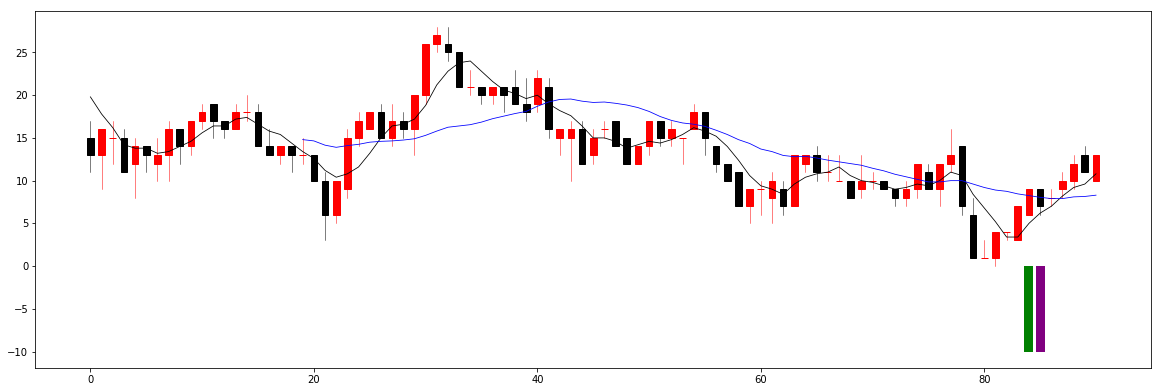

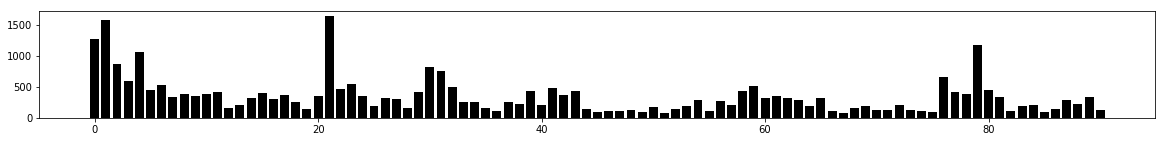

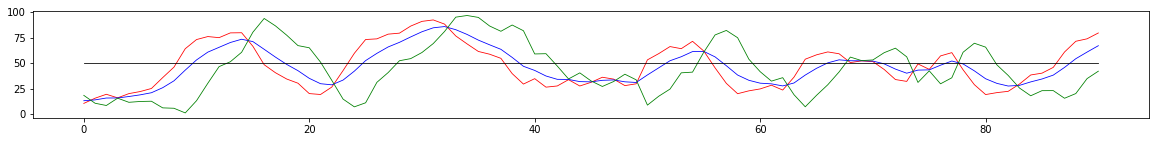

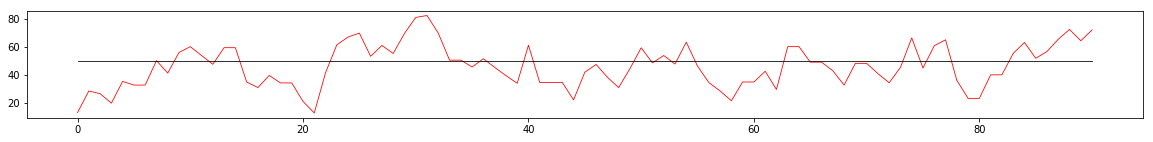

2018/9/14 0


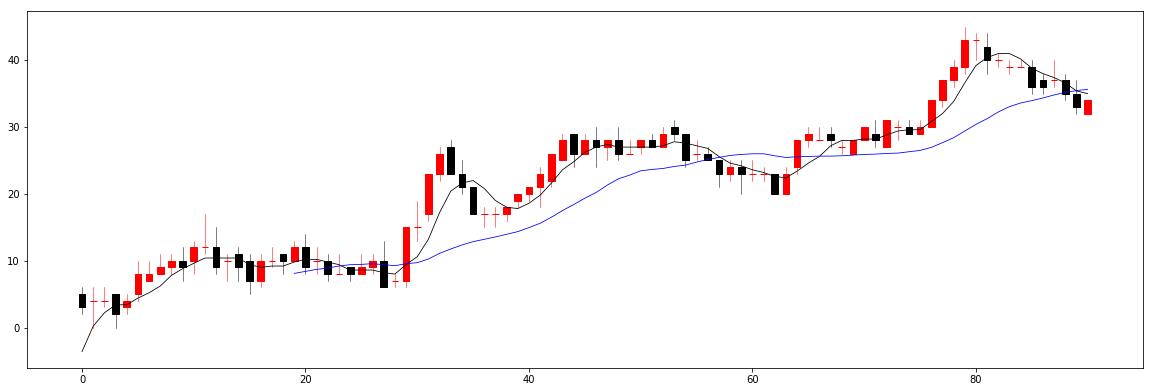

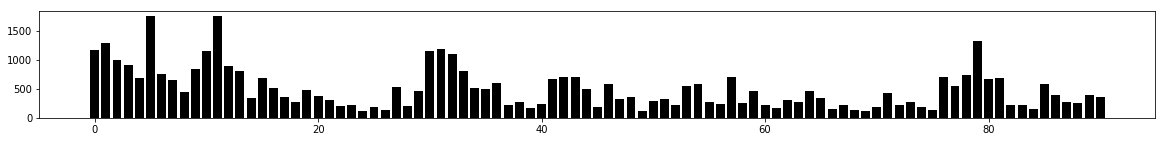

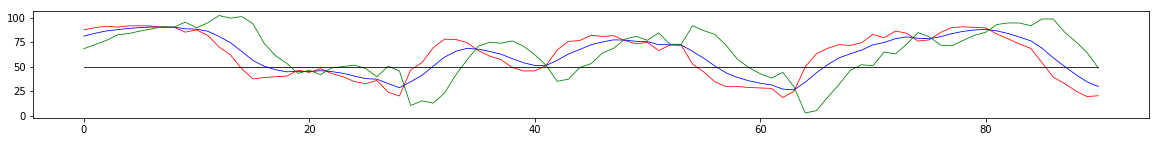

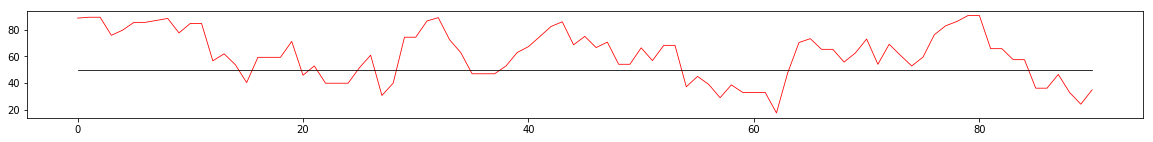

2018/9/13 0


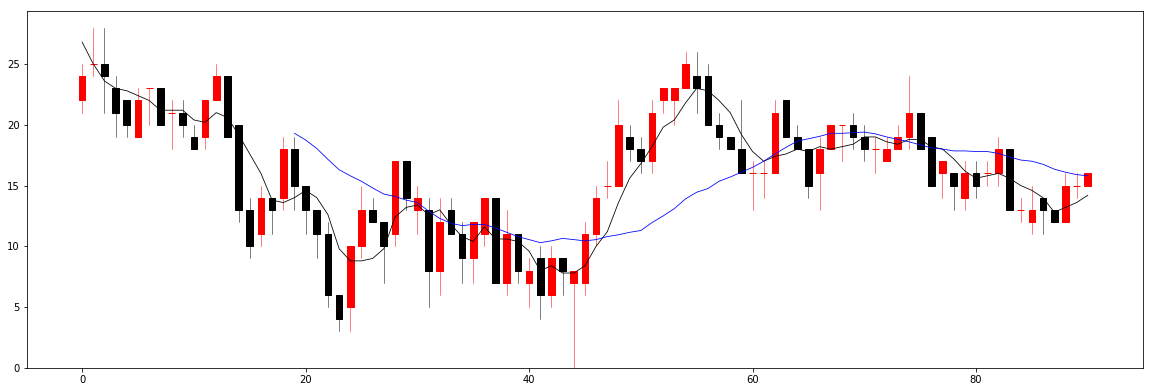

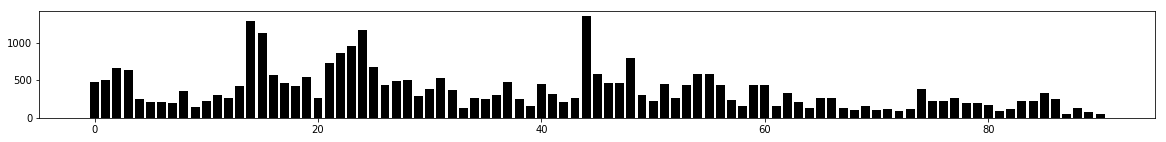

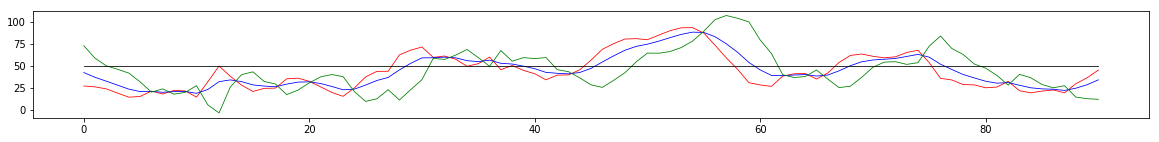

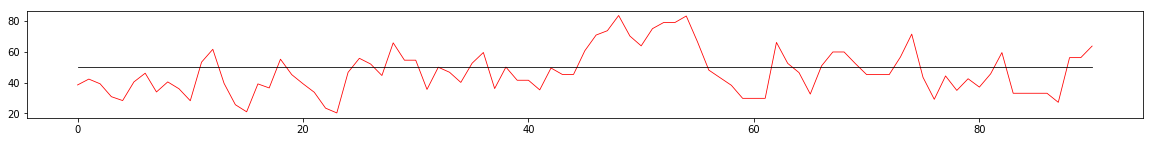

2018/9/12 2.5


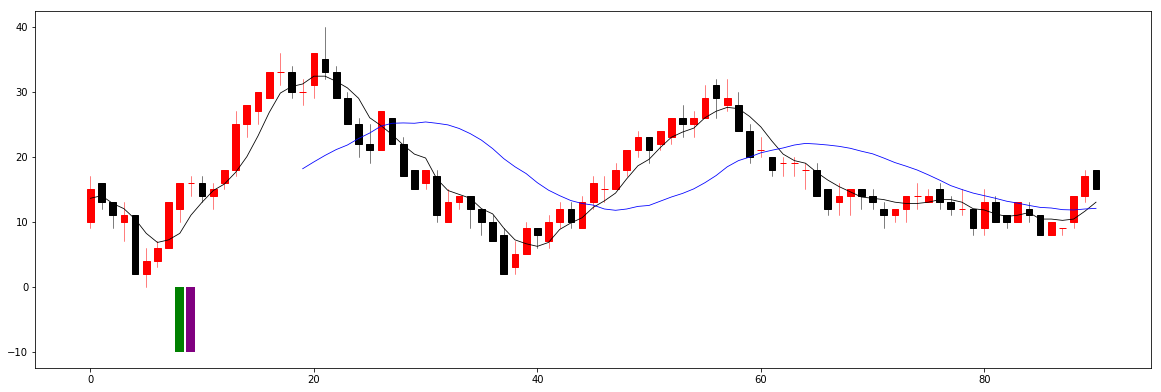

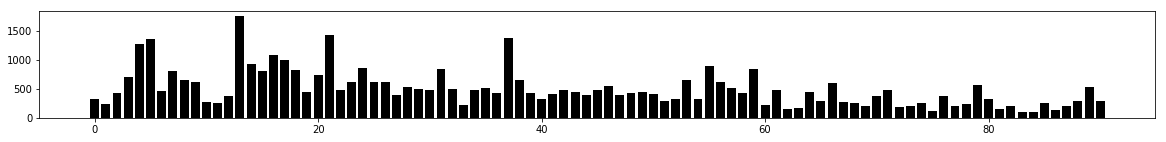

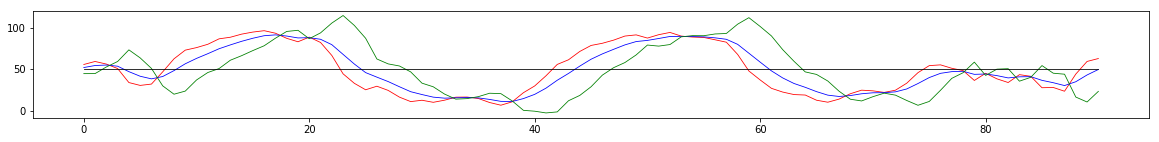

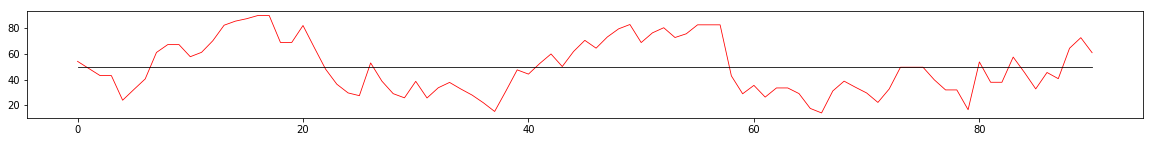

2018/9/11 -2.5


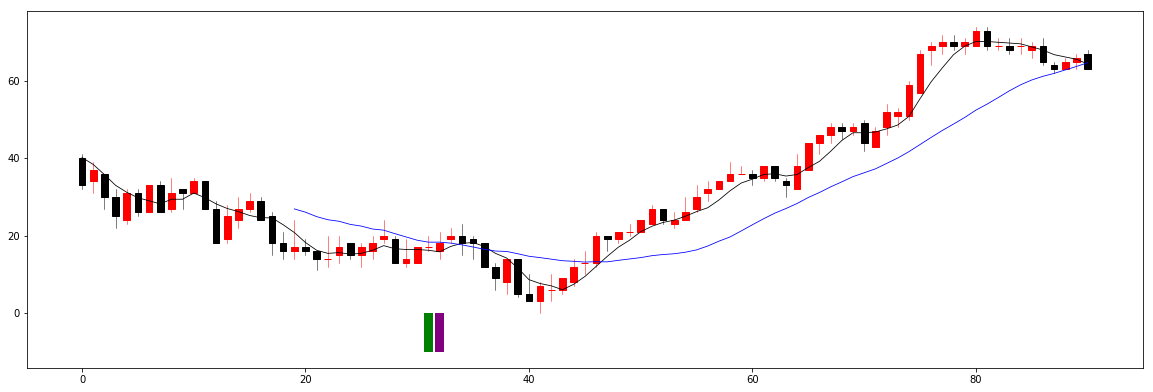

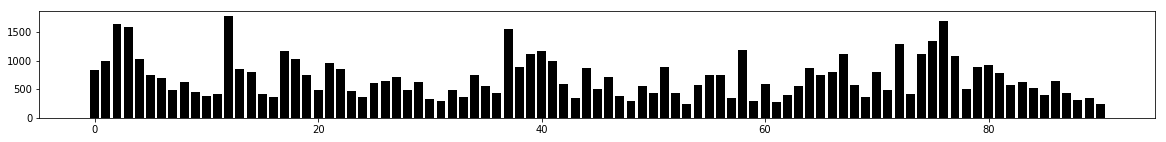

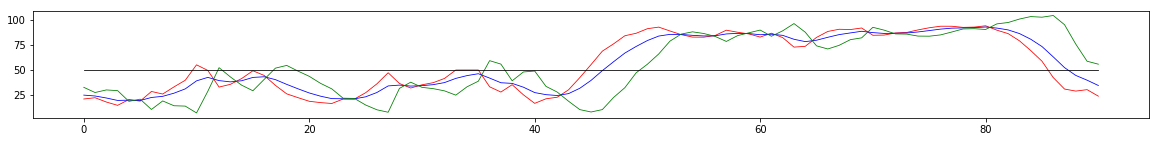

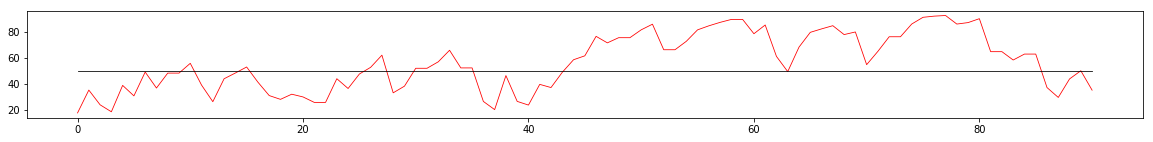

2018/9/10 0


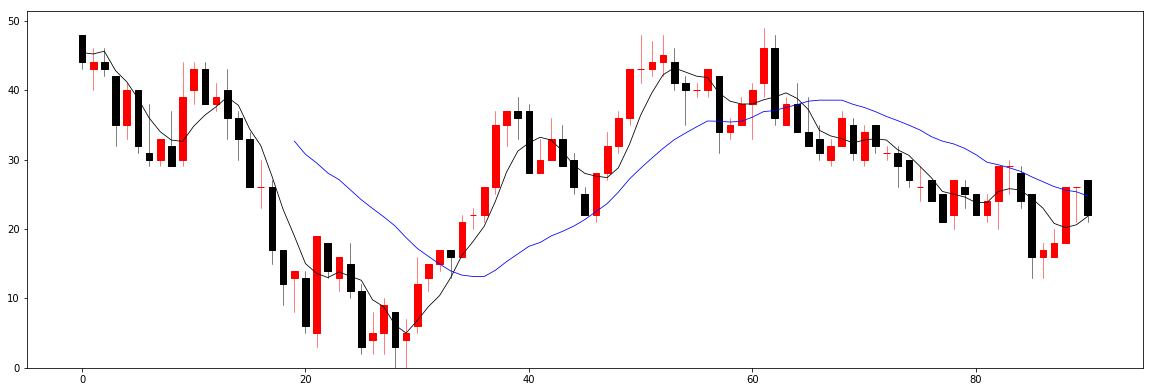

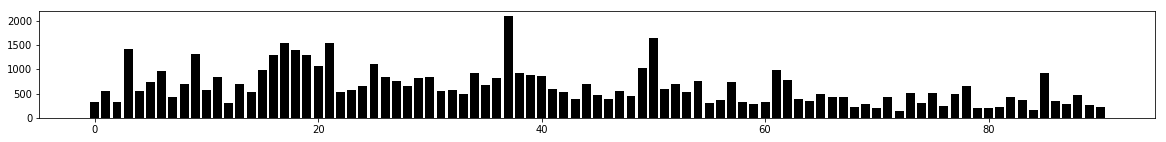

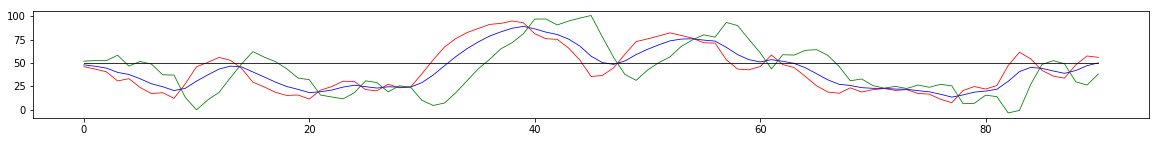

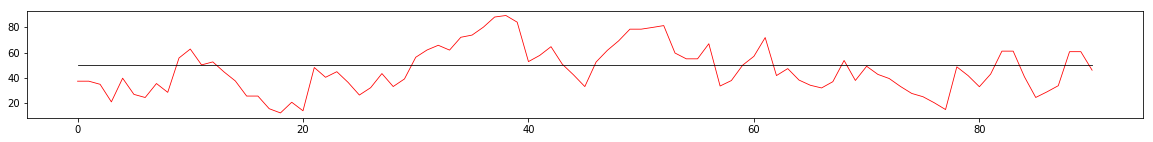

2018/9/7 0


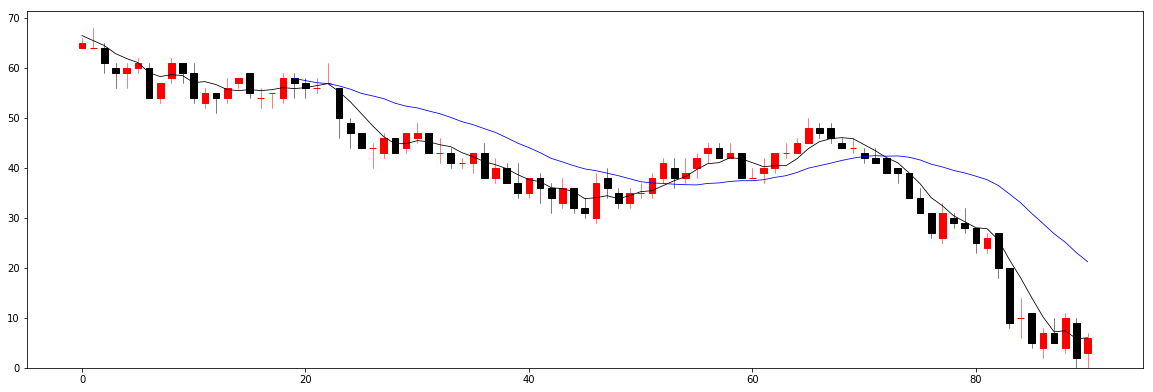

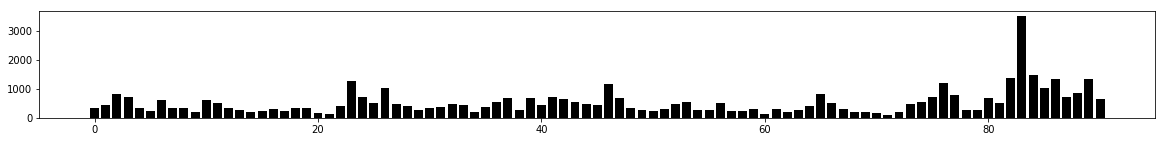

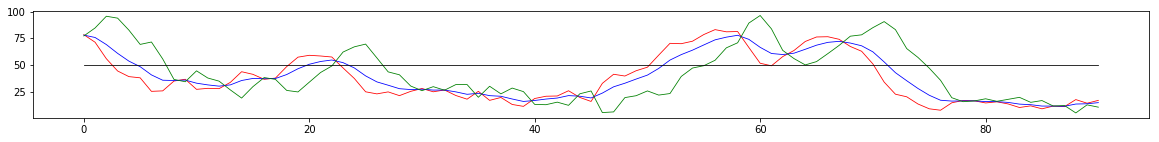

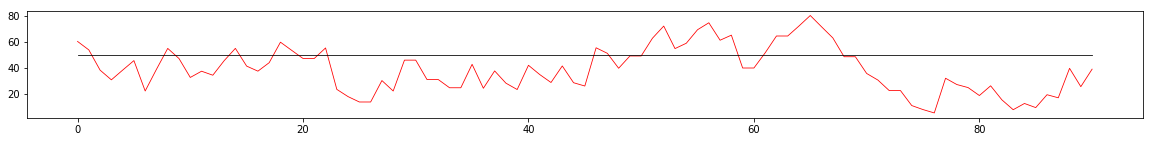

2018/9/6 -2.5


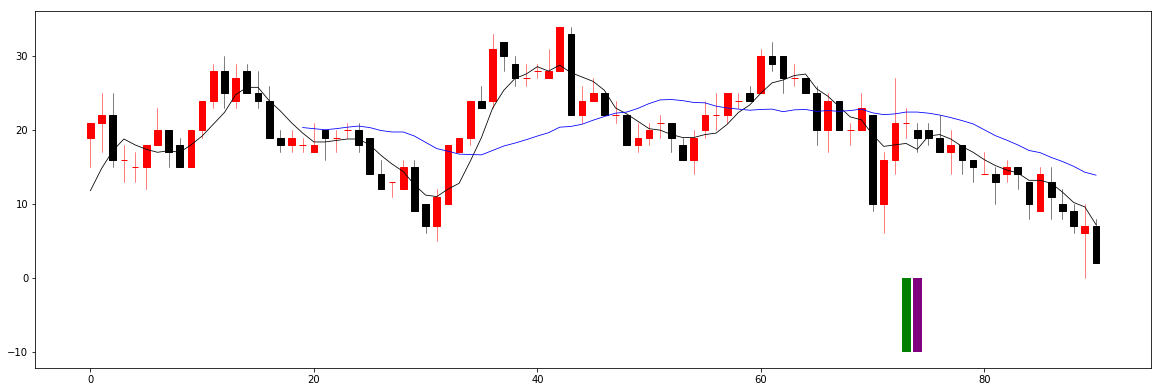

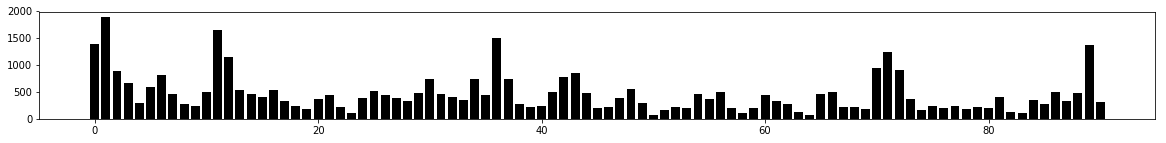

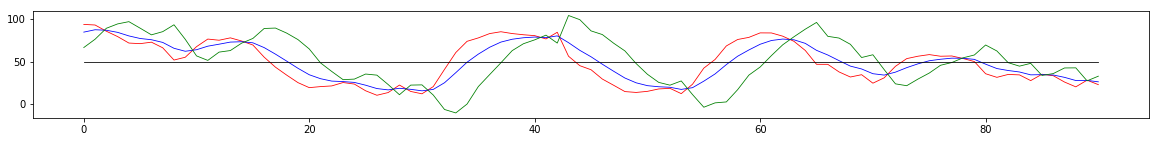

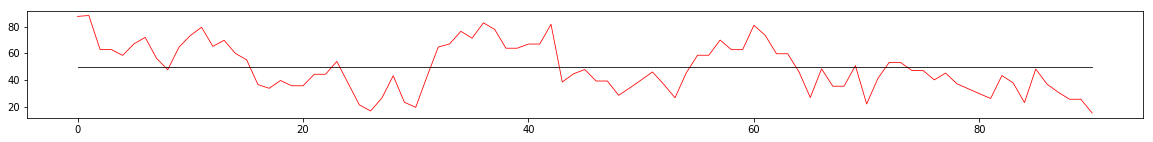

2018/9/5 -4.0


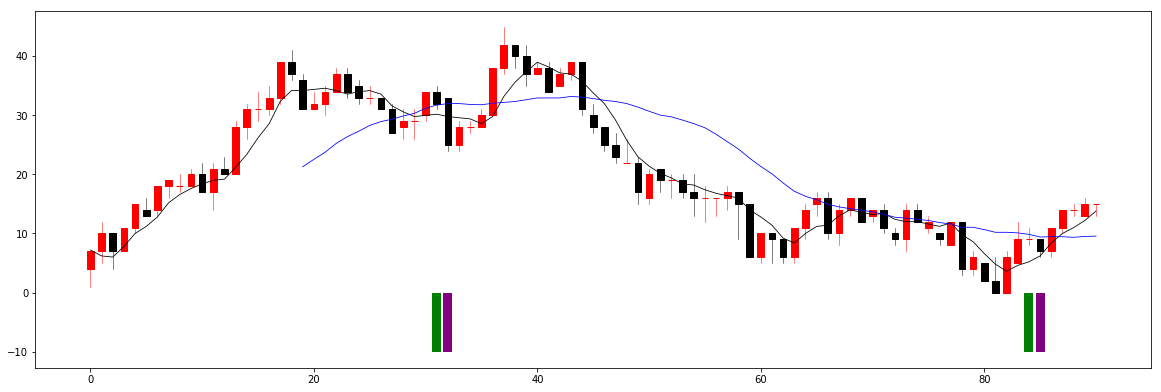

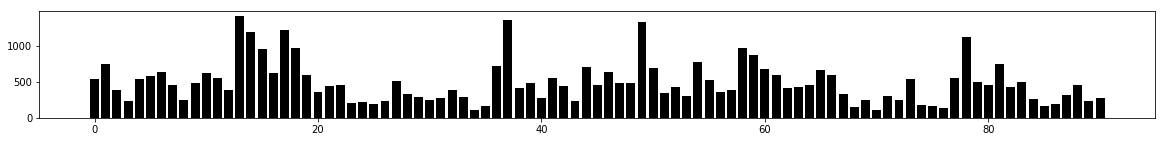

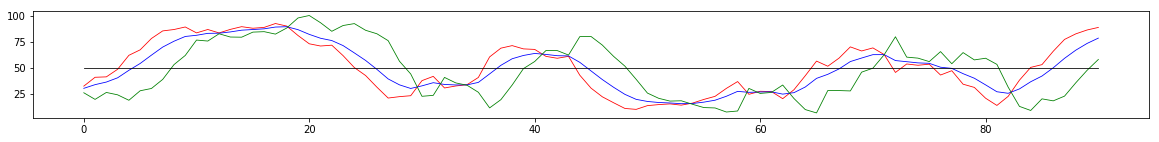

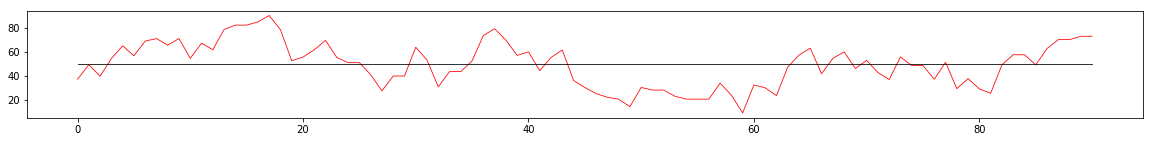

2018/9/4 0


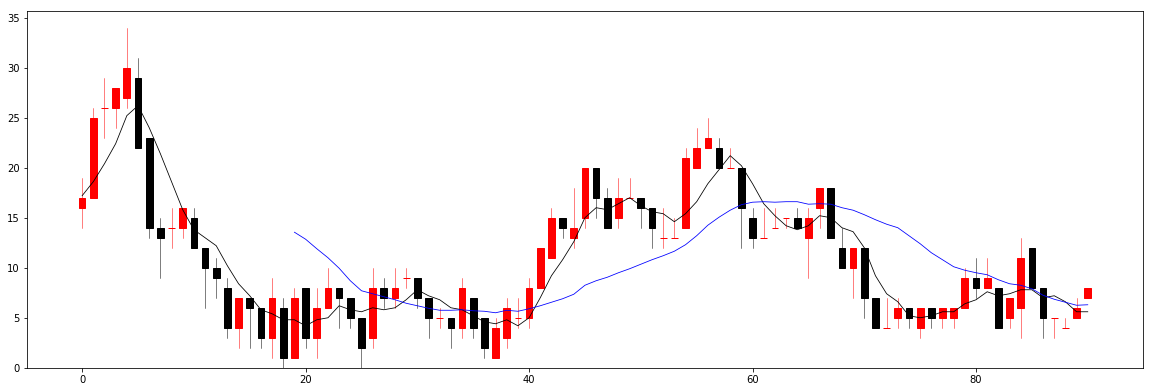

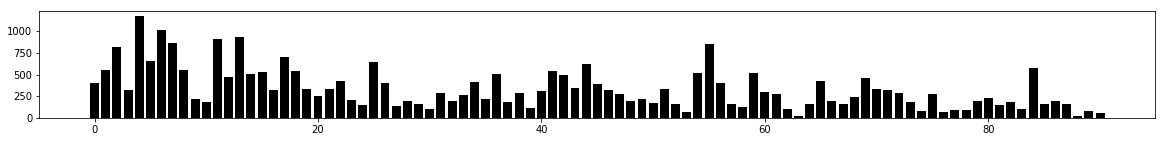

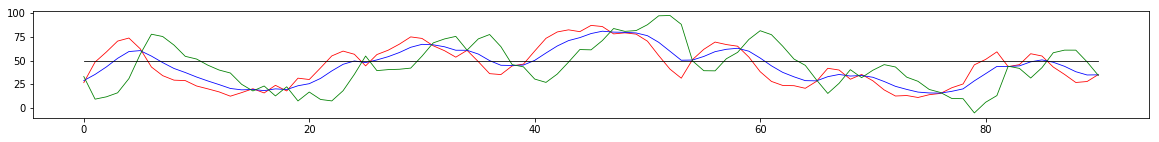

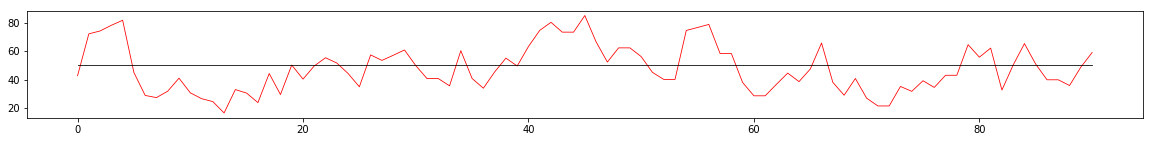

2018/9/3 0


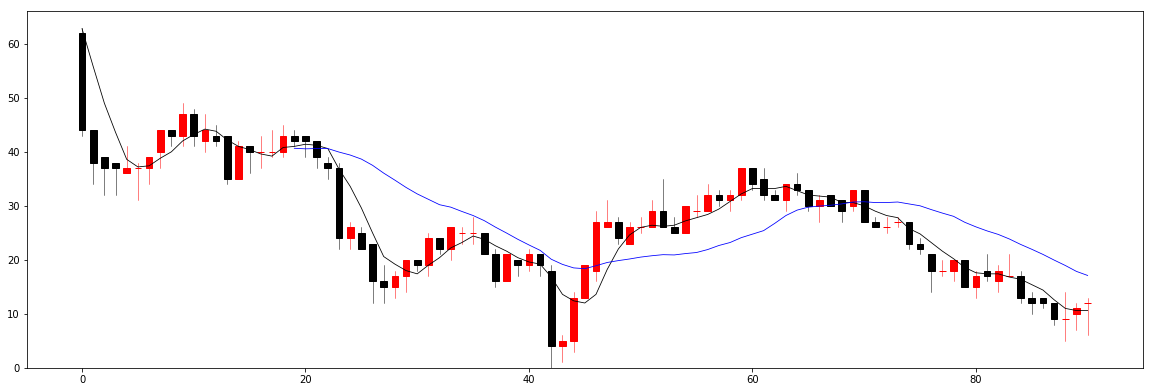

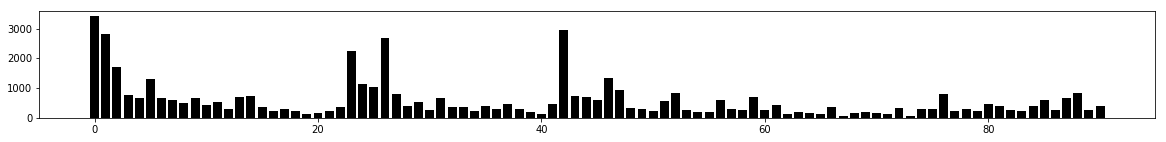

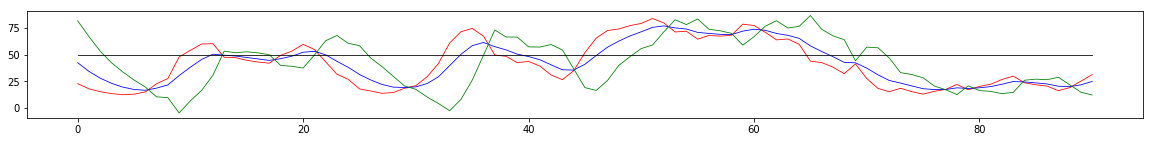

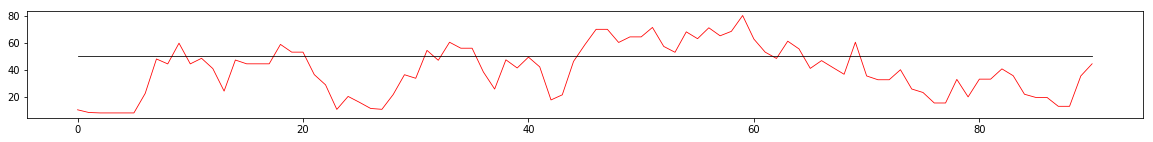

2018/8/31 0.5


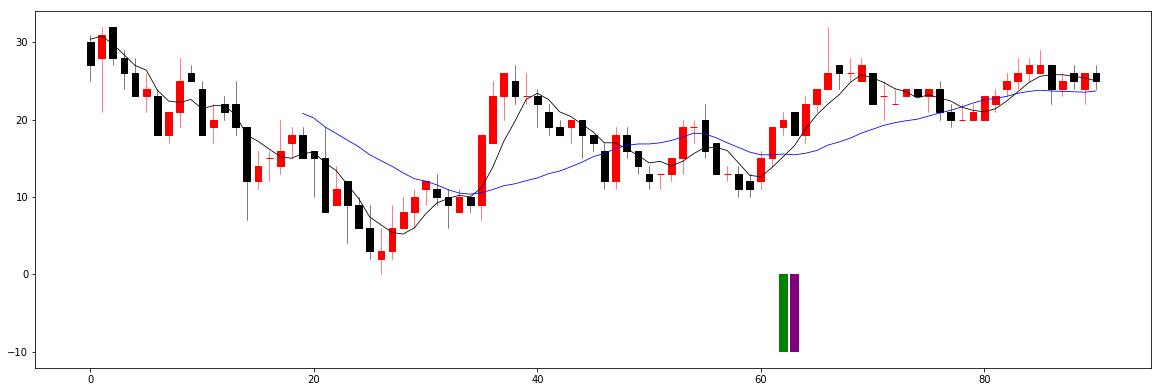

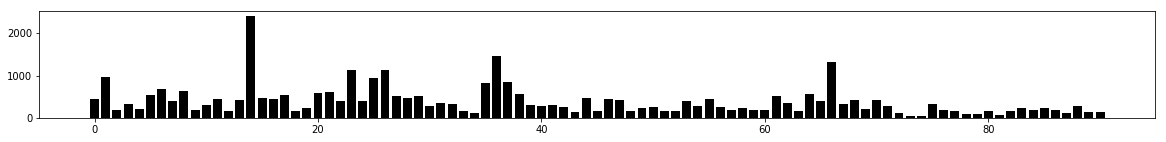

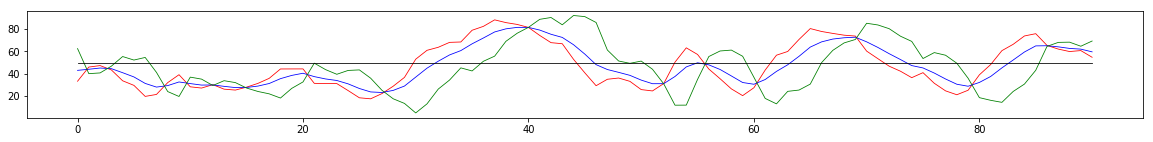

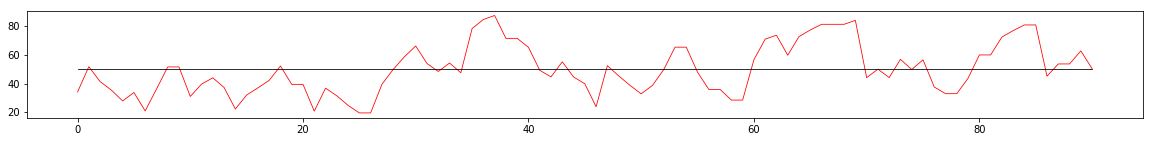

2018/8/30 2.5


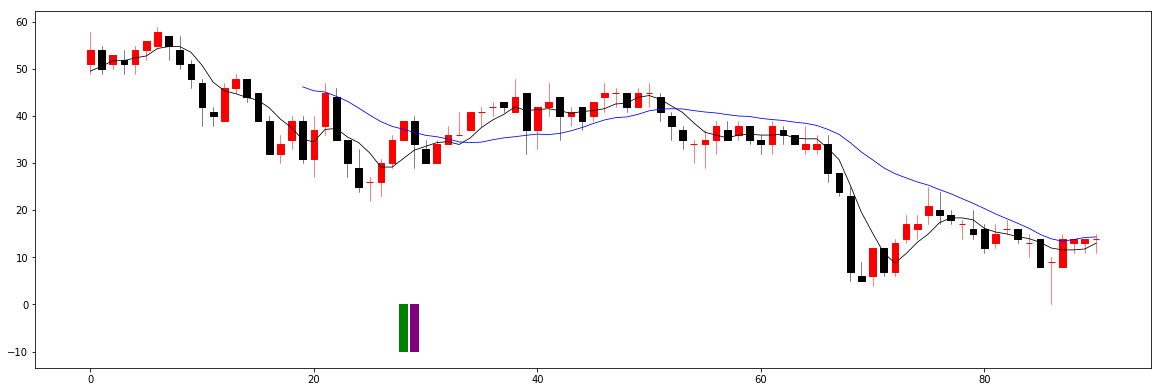

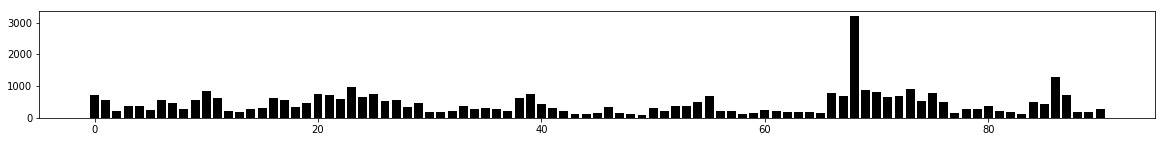

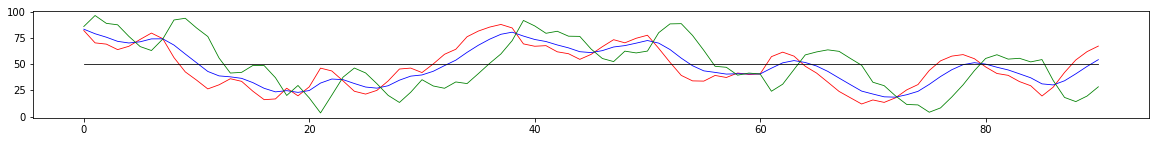

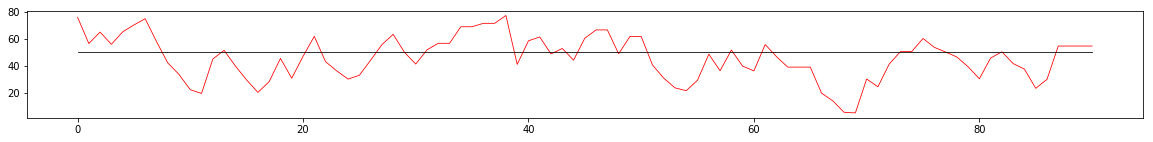

2018/8/29 0


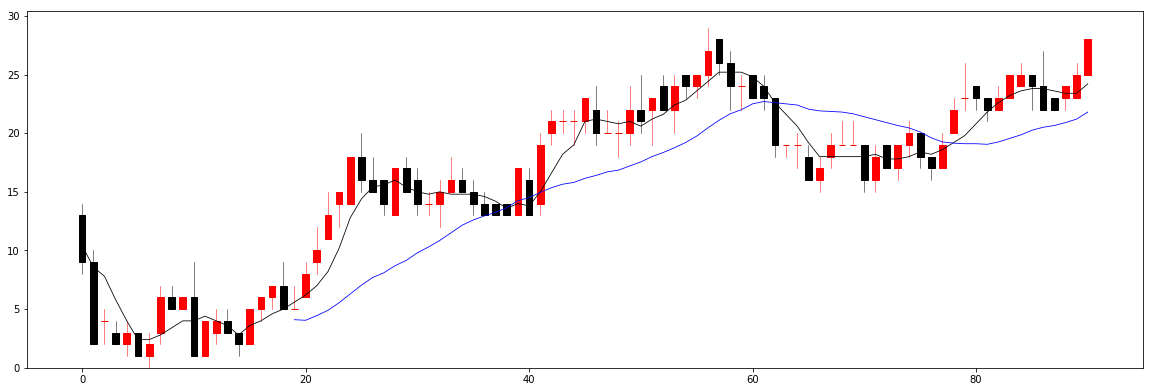

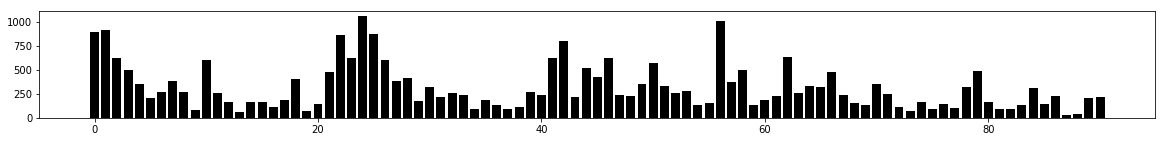

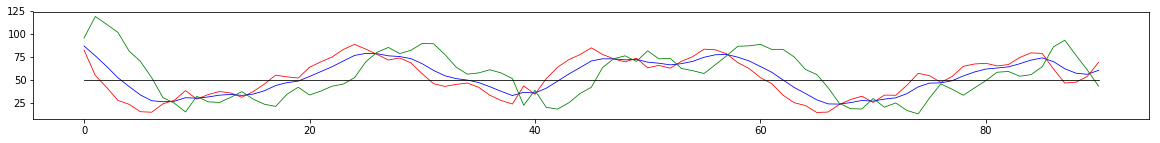

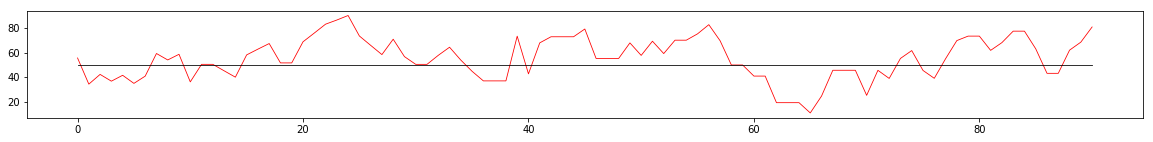

2018/8/28 0


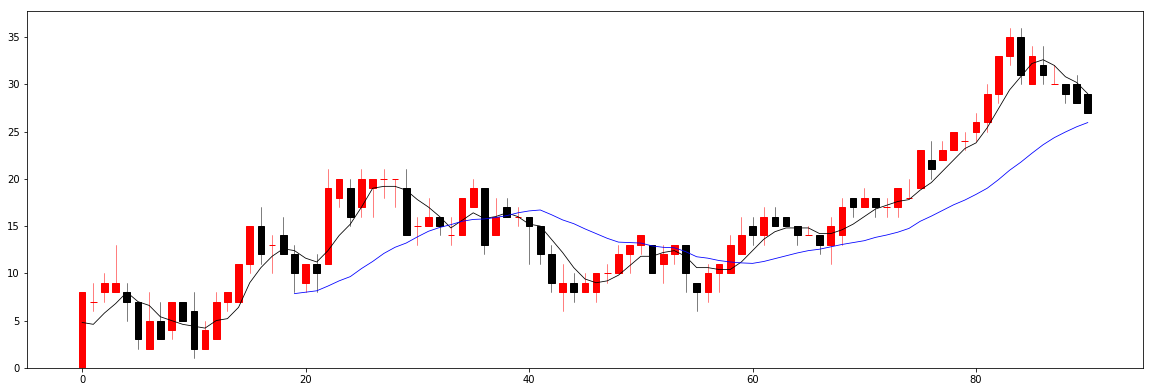

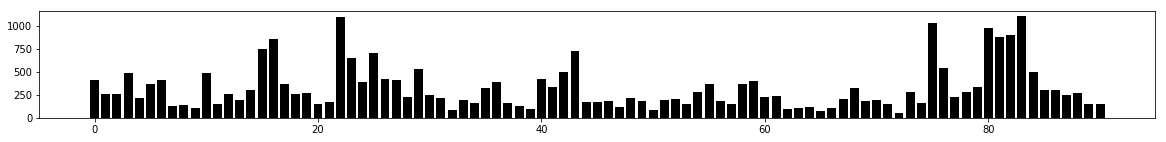

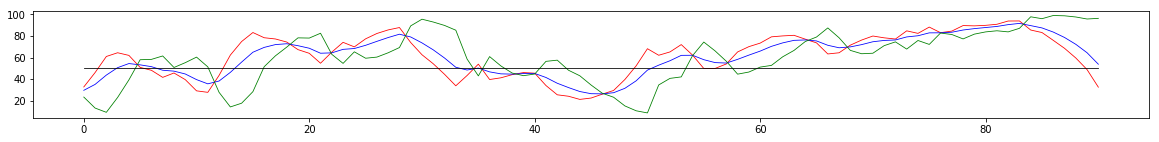

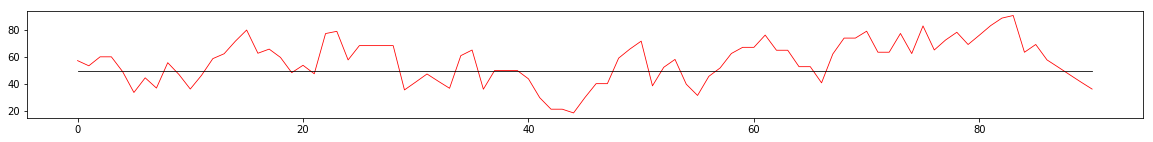

2018/8/27 0


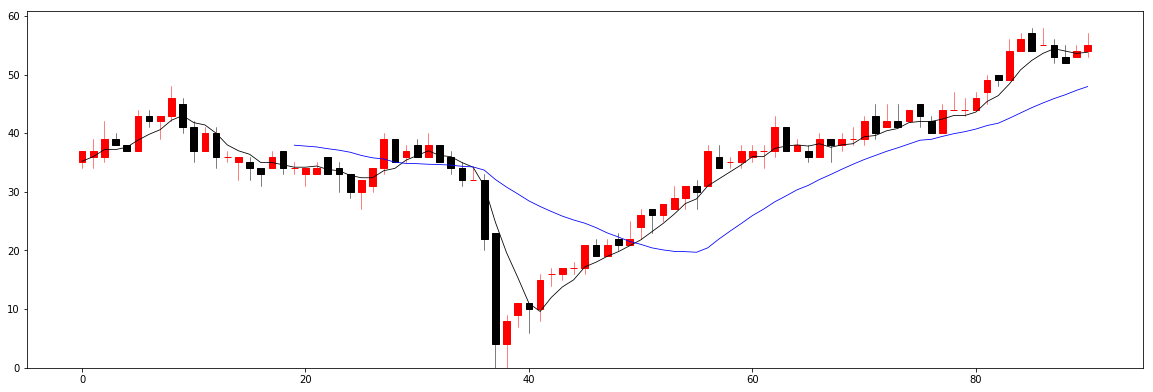

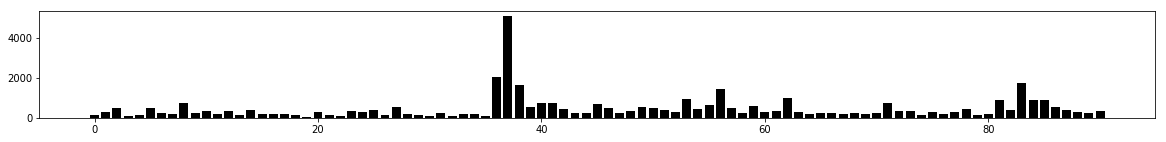

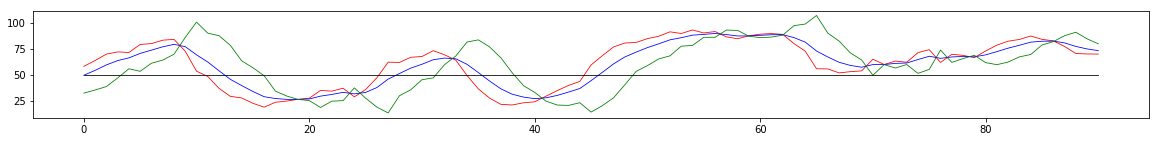

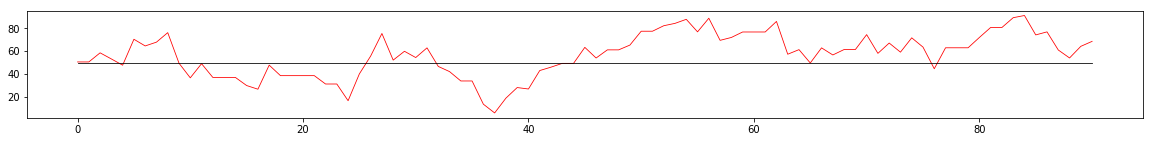

2018/8/24 7.5


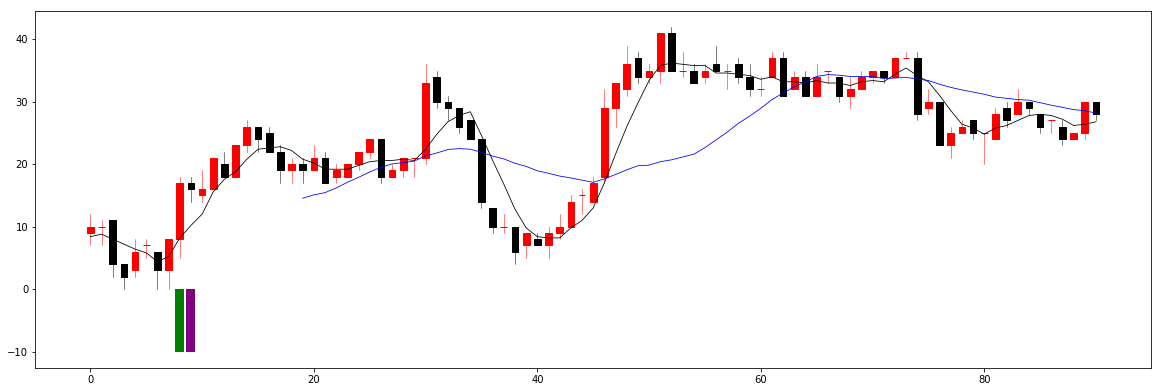

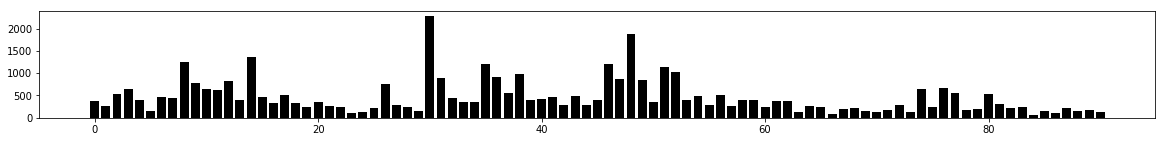

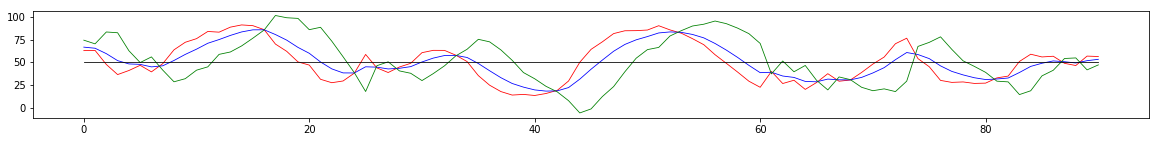

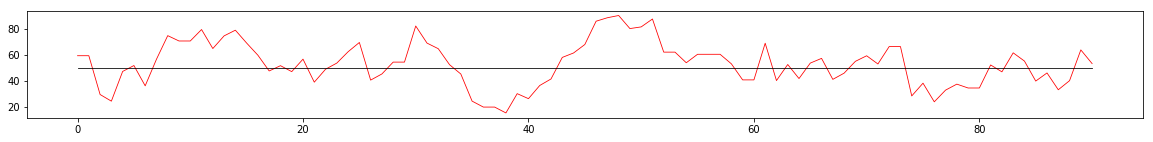

2018/8/23 0


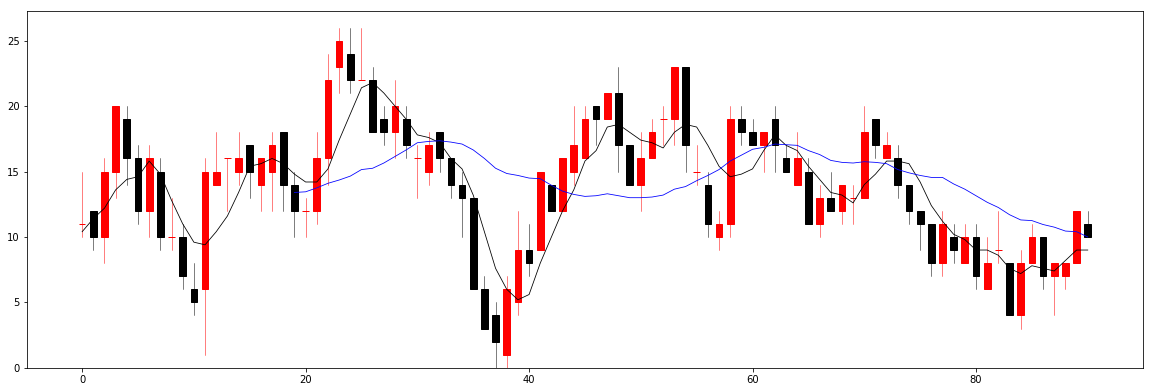

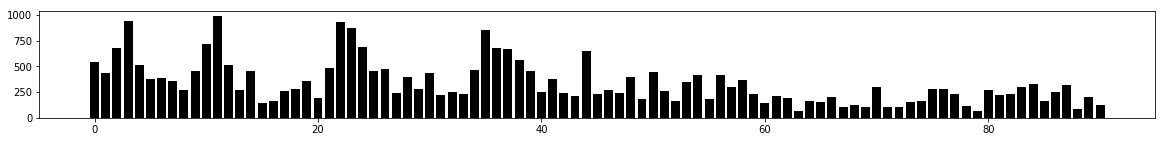

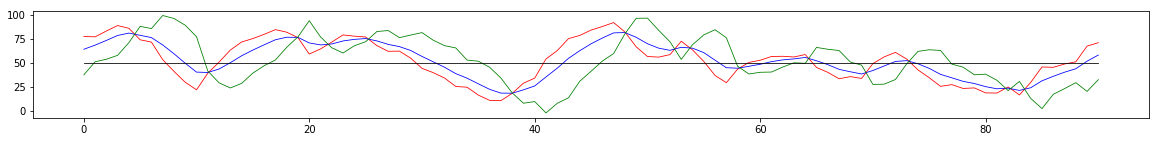

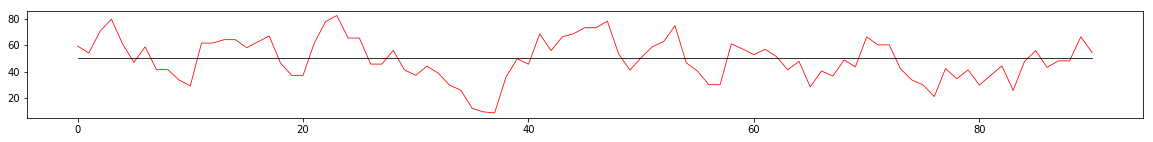

2018/8/22 0


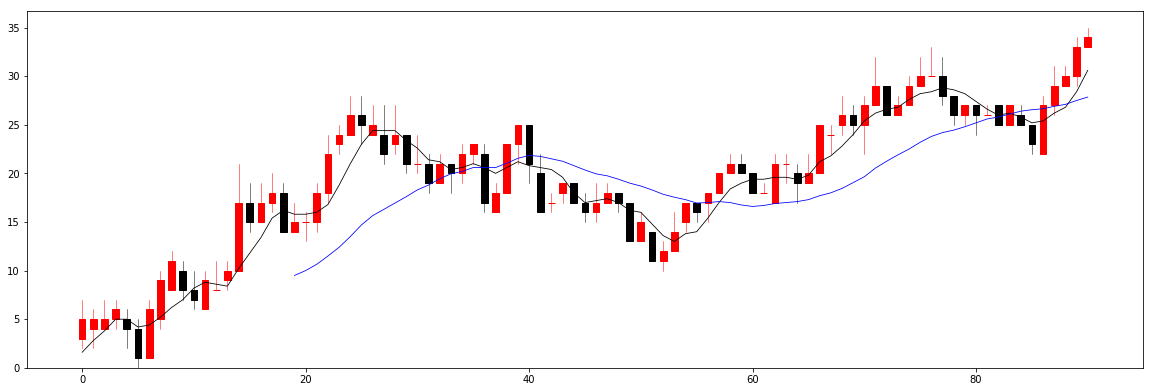

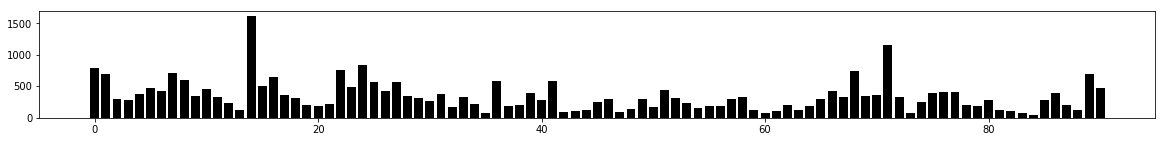

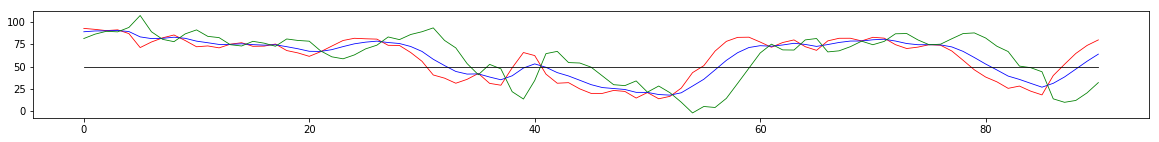

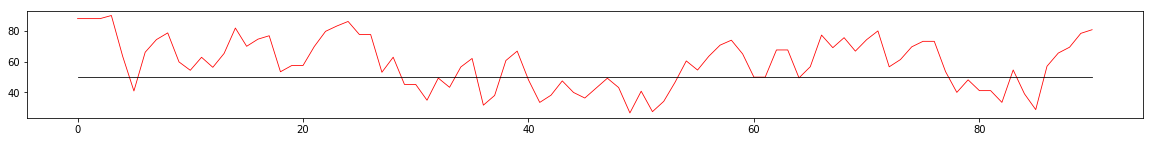

2018/8/21 0


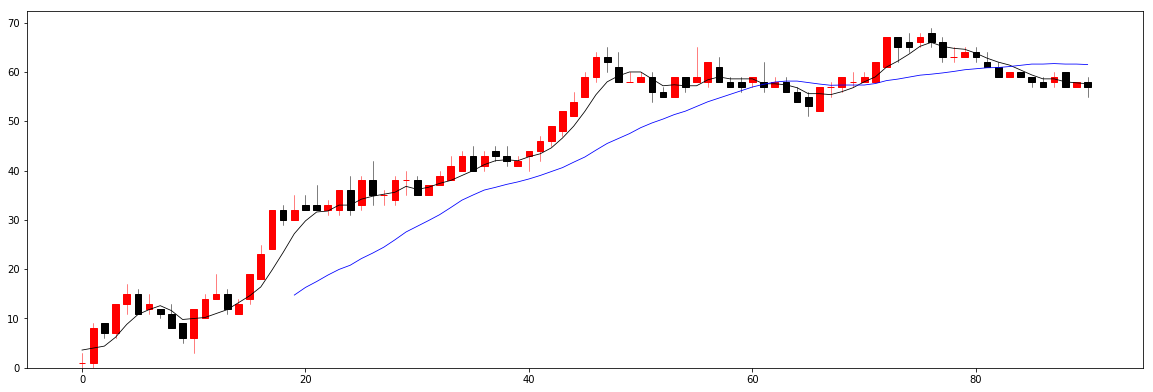

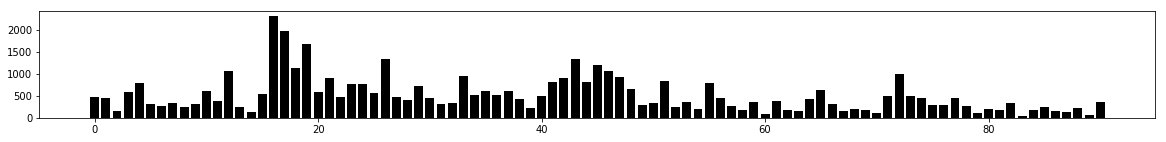

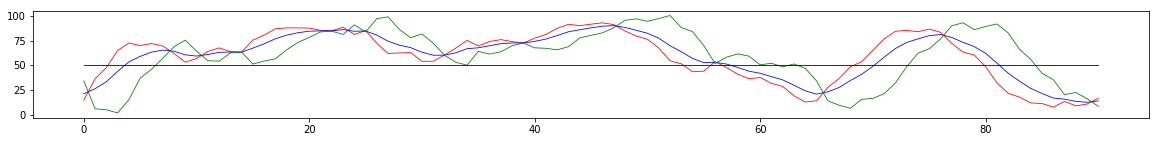

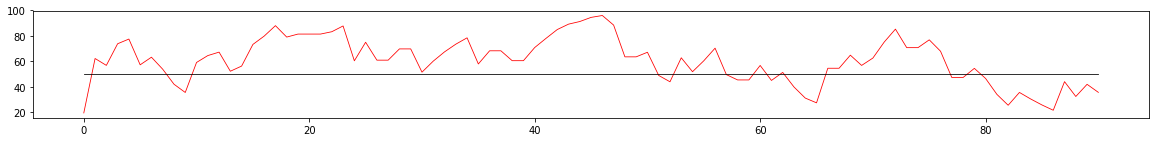

2018/8/20 0.5


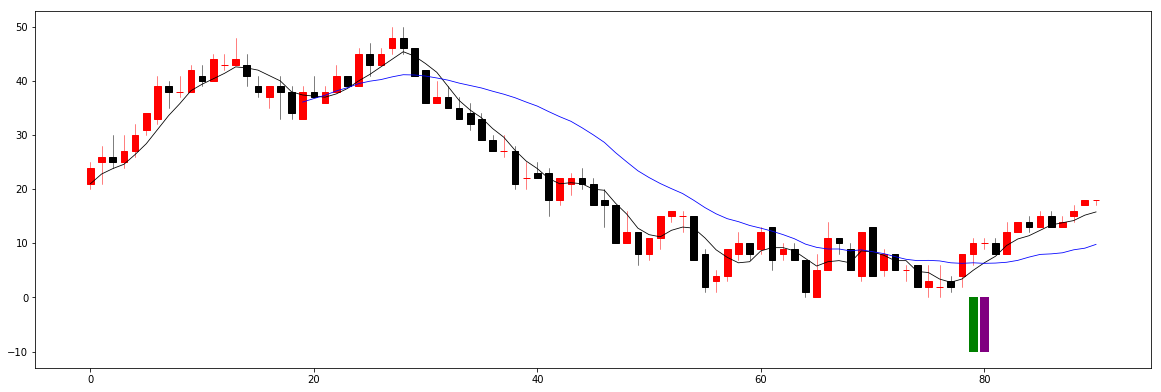

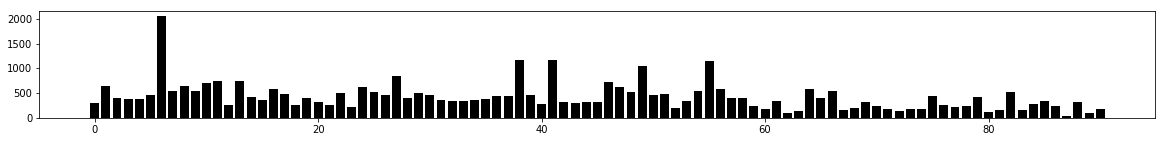

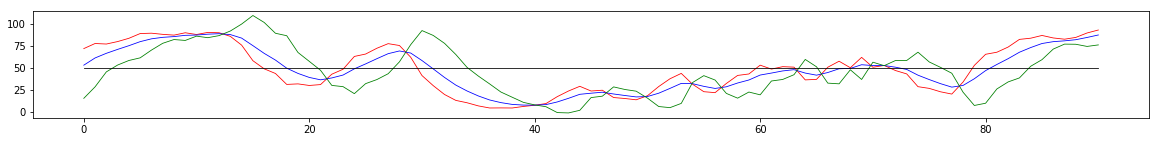

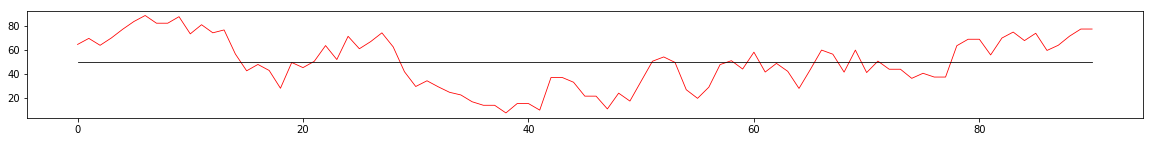

2018/8/17 0


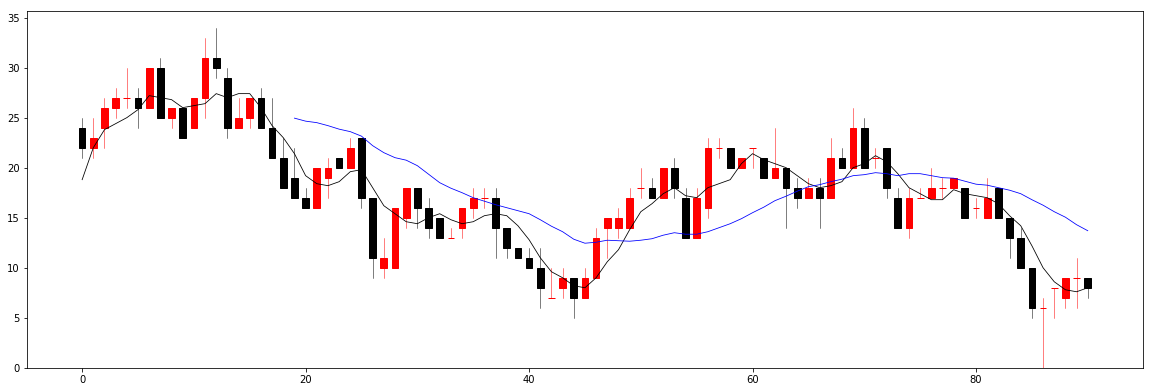

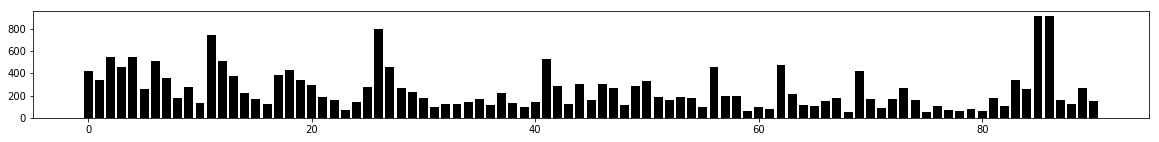

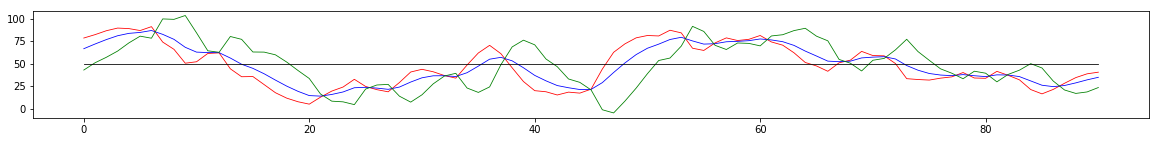

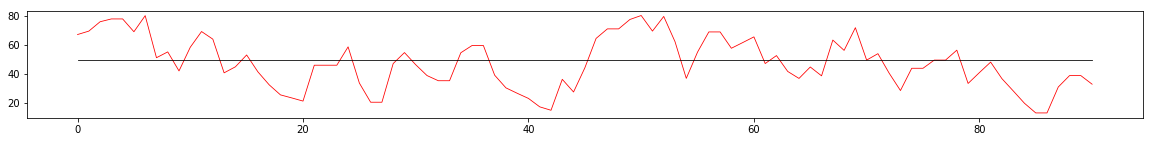

2018/8/16 -4.5


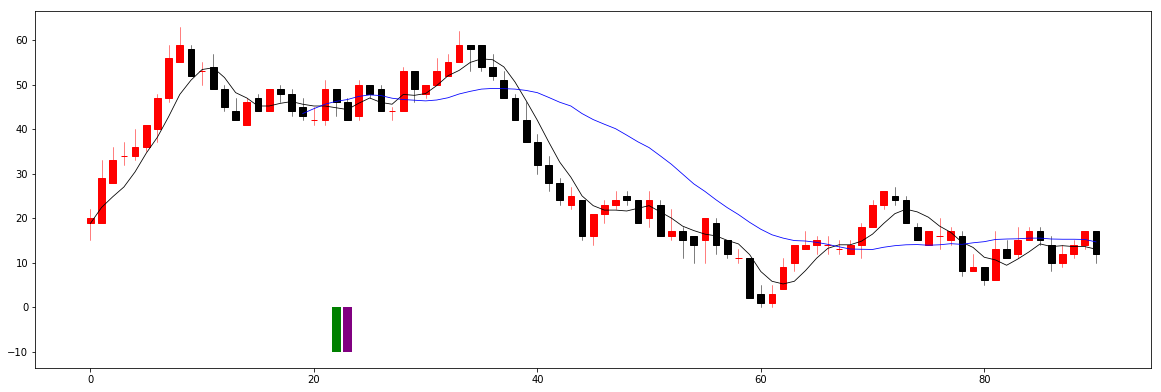

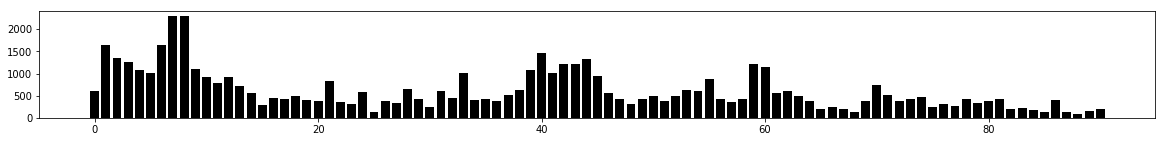

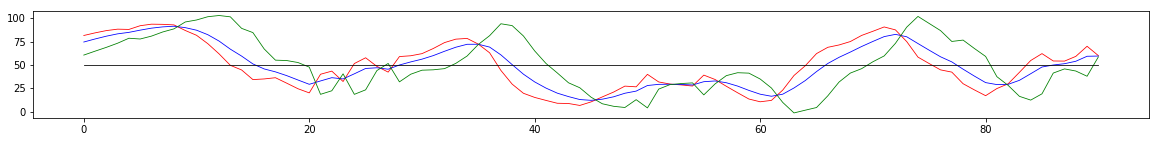

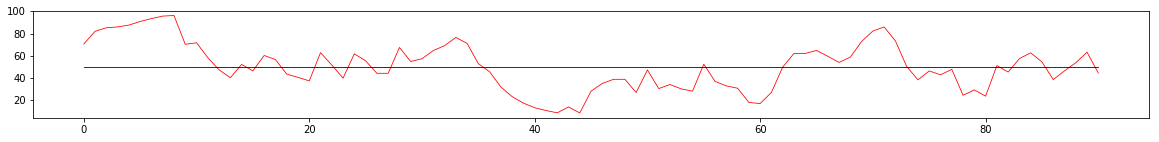

2018/8/15 -2.5


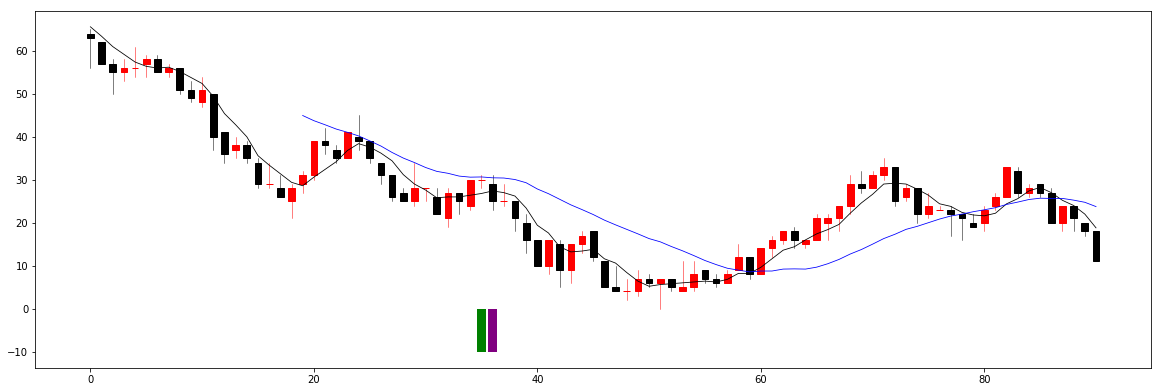

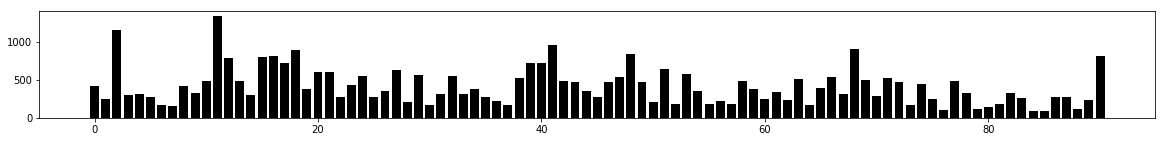

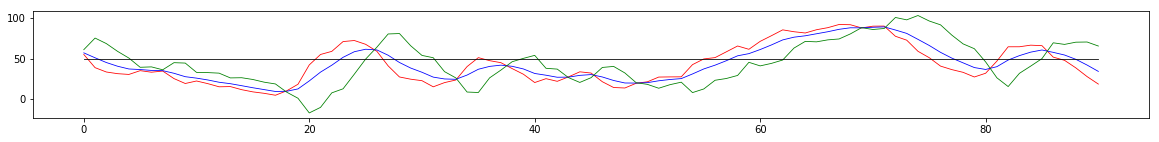

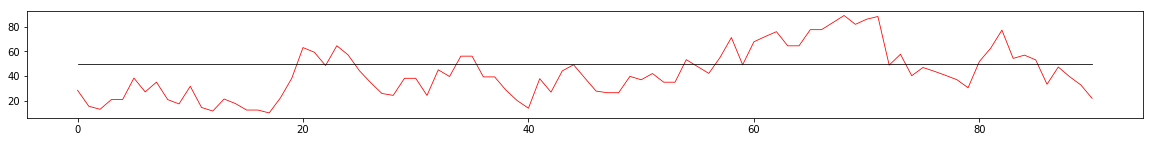

2018/8/14 0


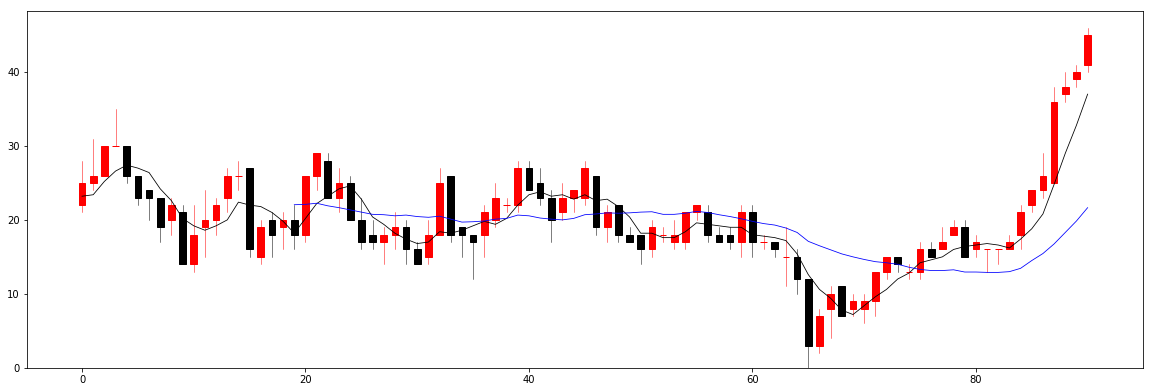

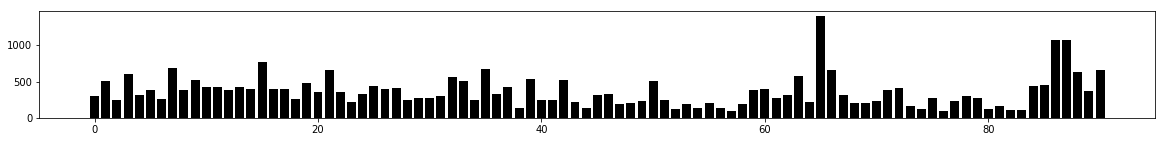

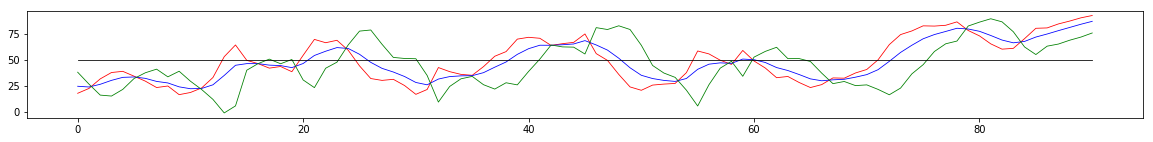

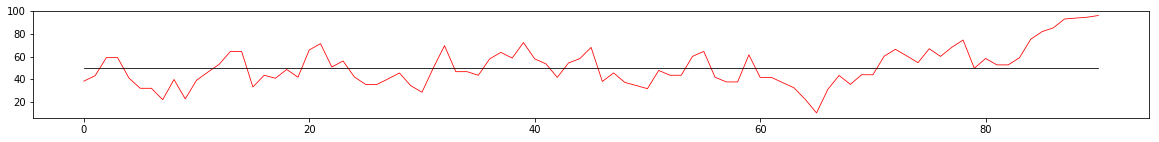

2018/8/13 0


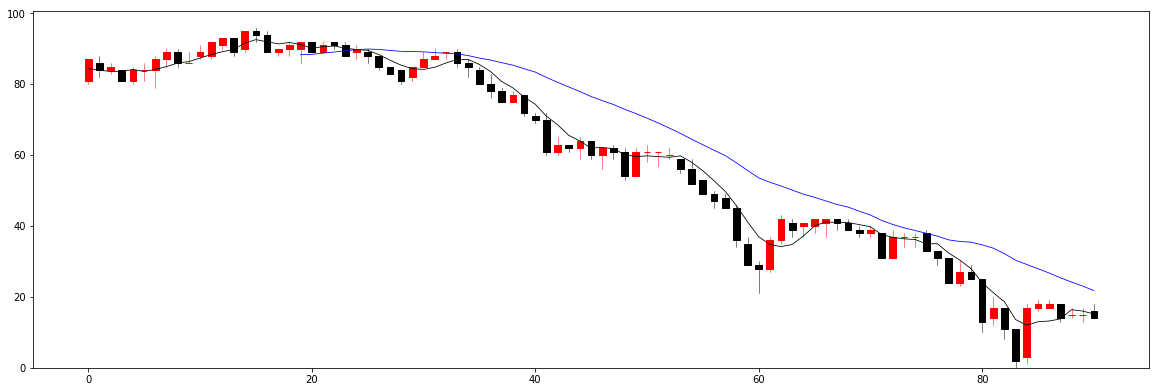

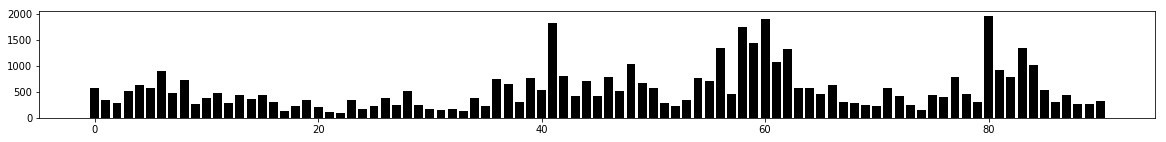

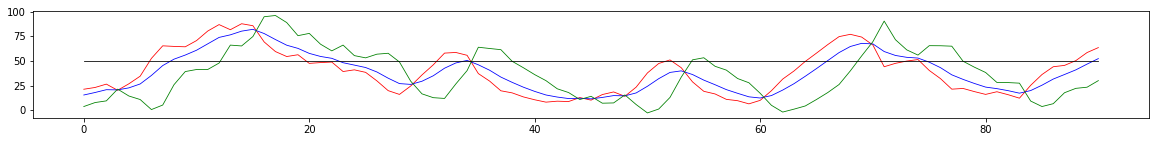

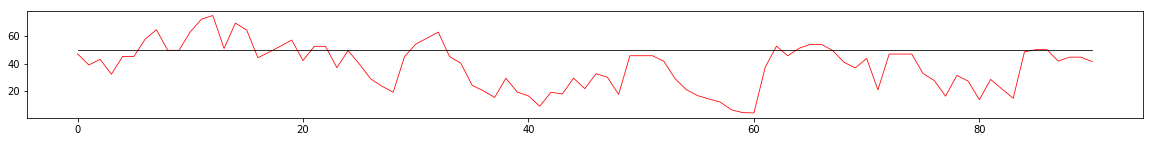

2018/8/10 0


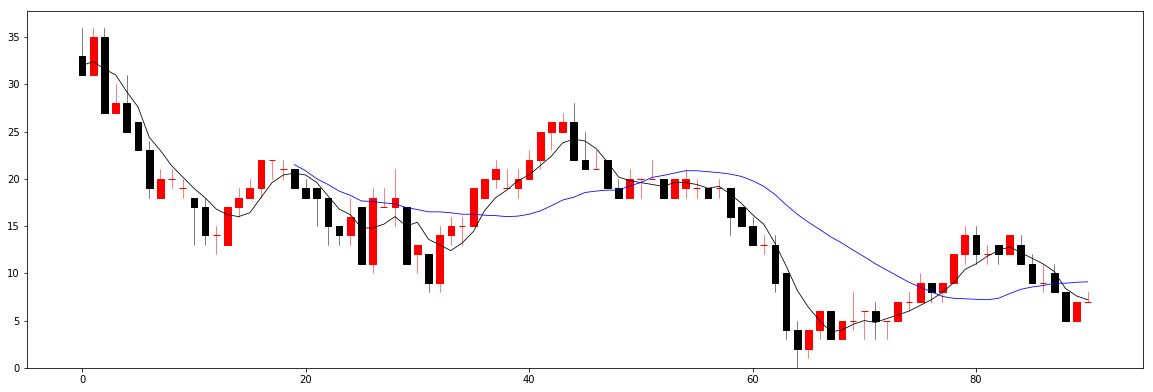

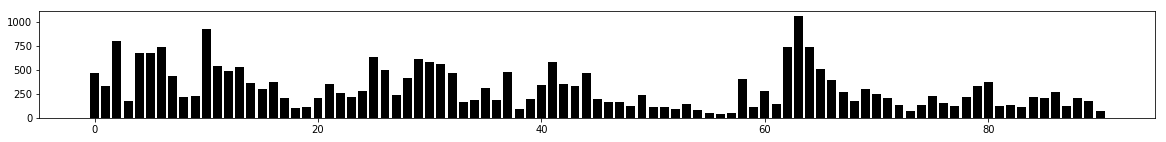

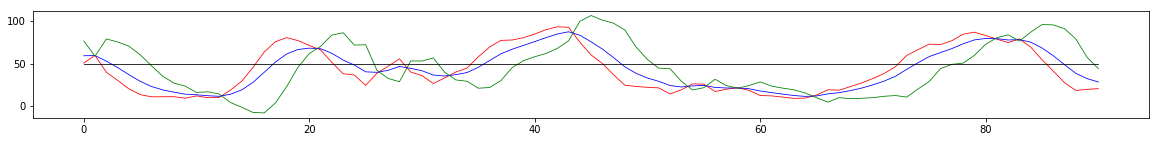

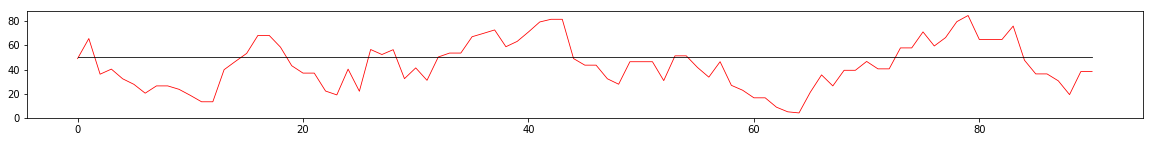

2018/8/9 0


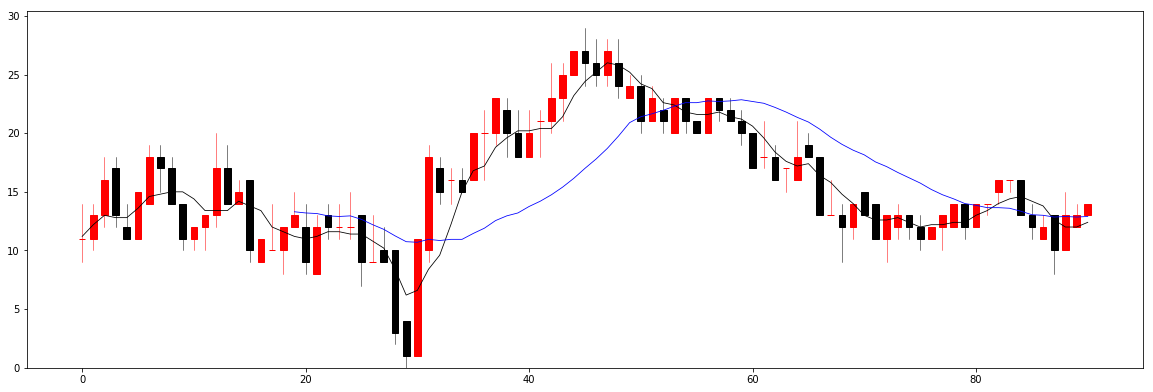

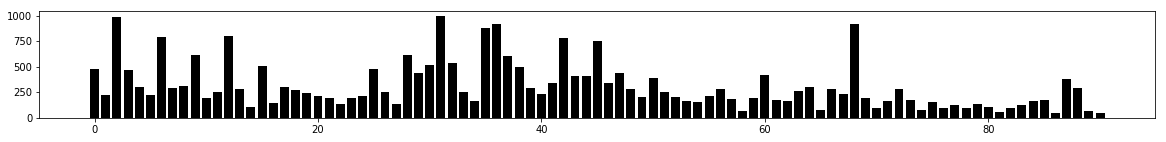

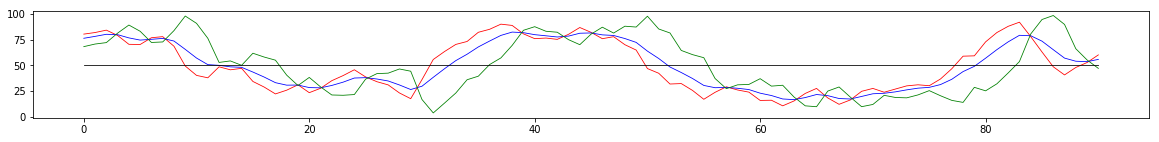

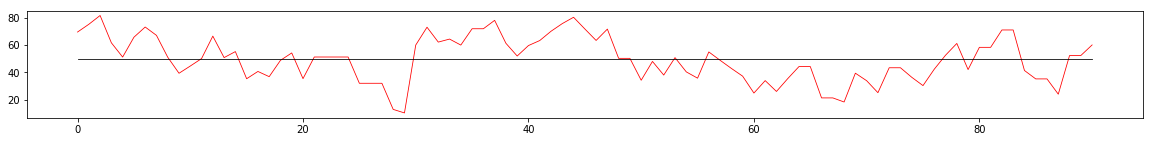

2018/8/8 0


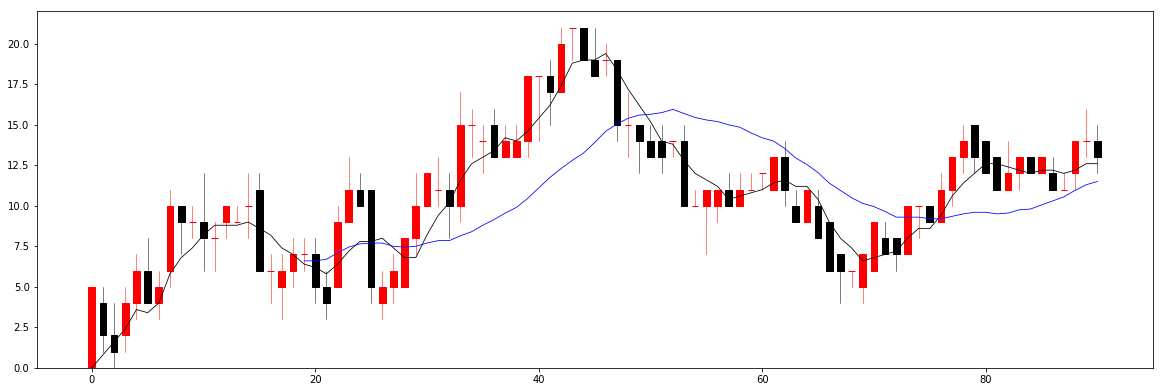

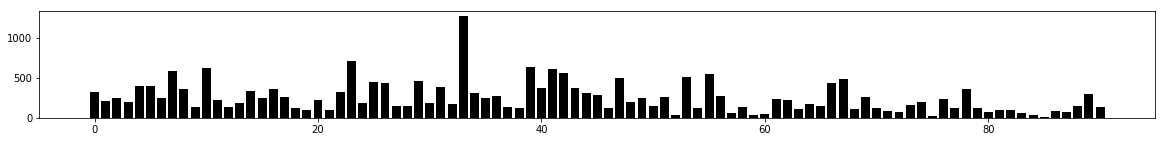

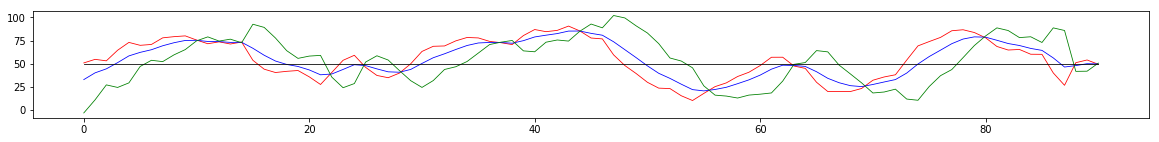

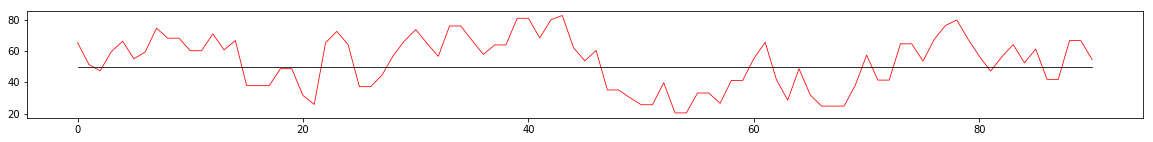

2018/8/7 0


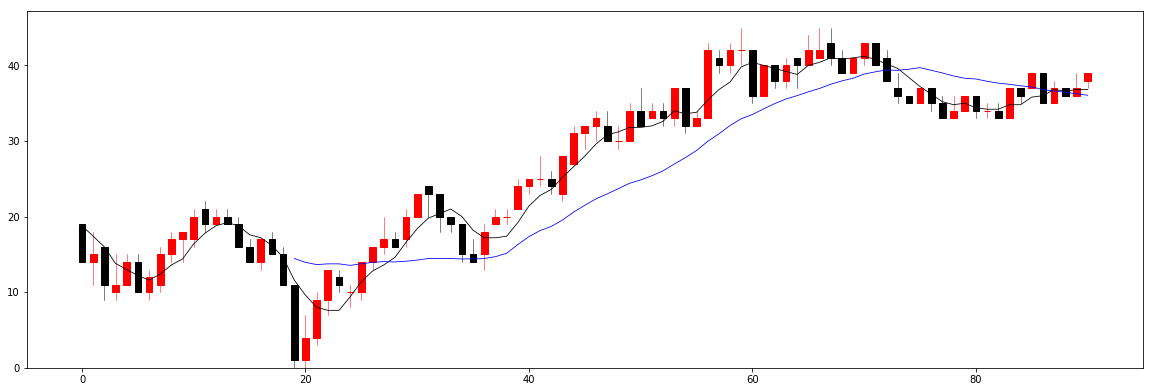

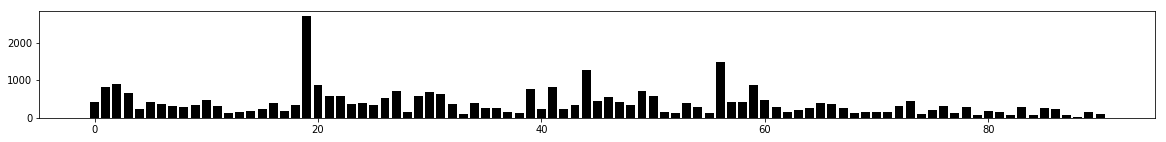

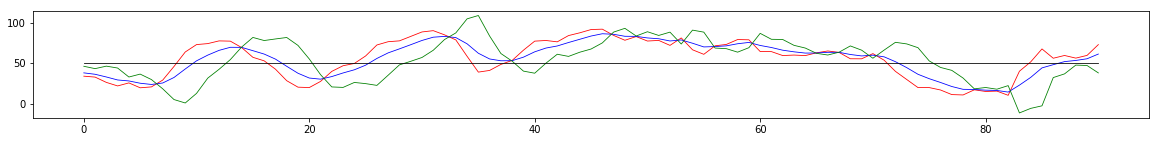

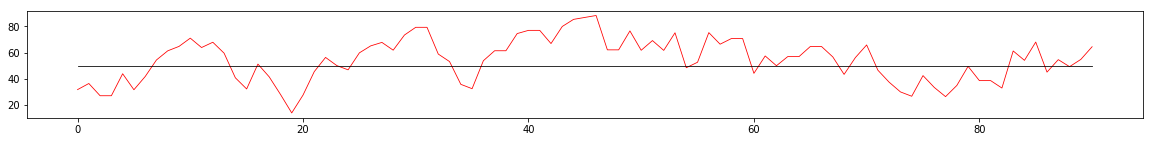

2018/8/6 0


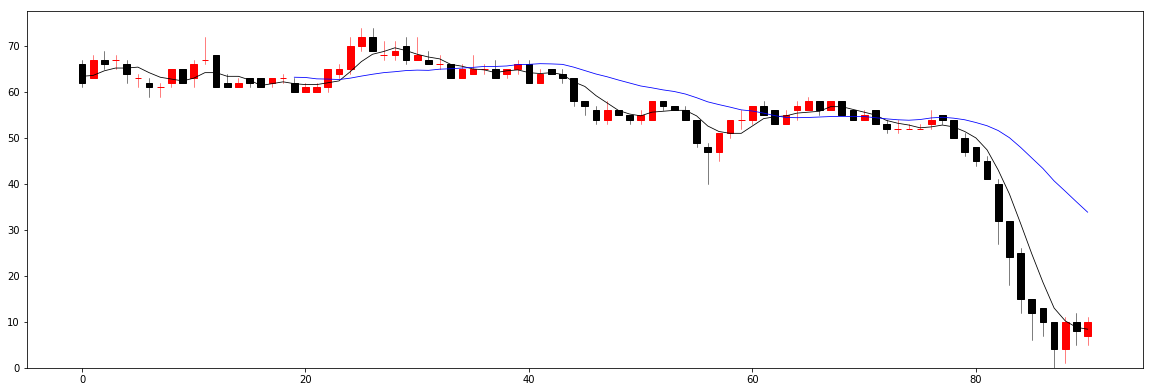

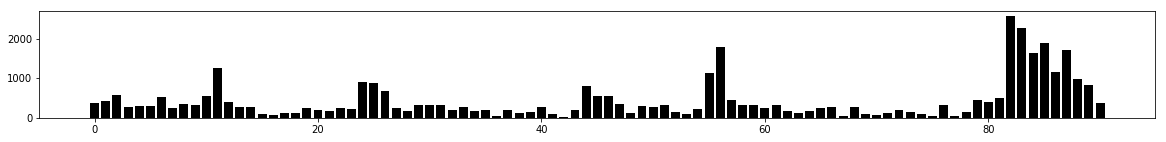

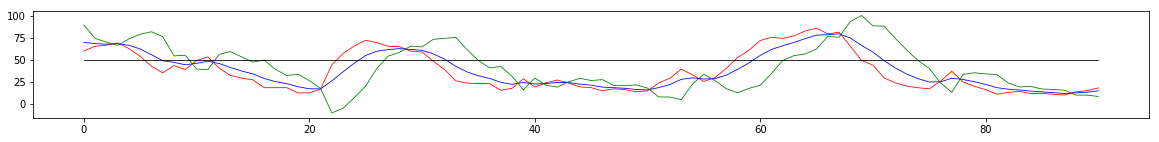

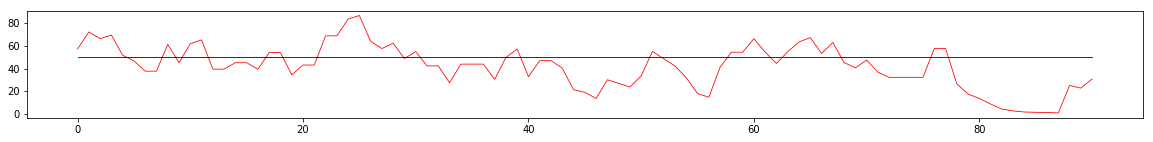

2018/8/3 0


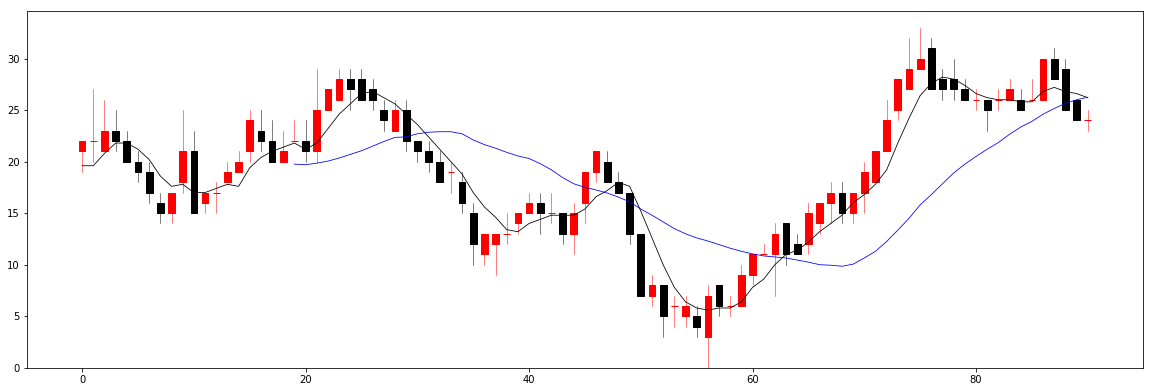

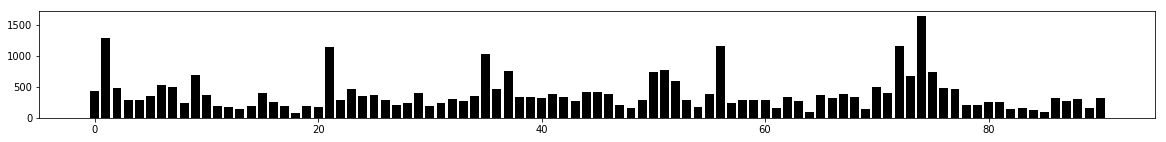

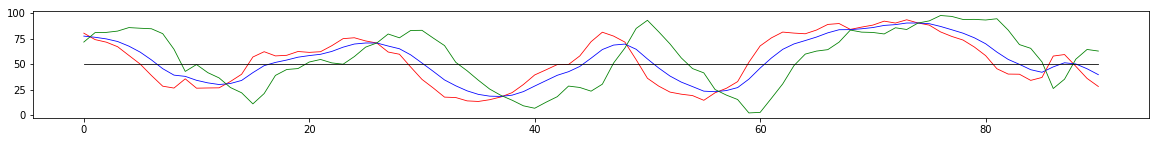

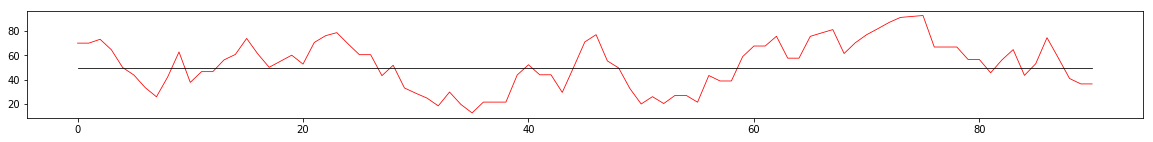

2018/8/2 0


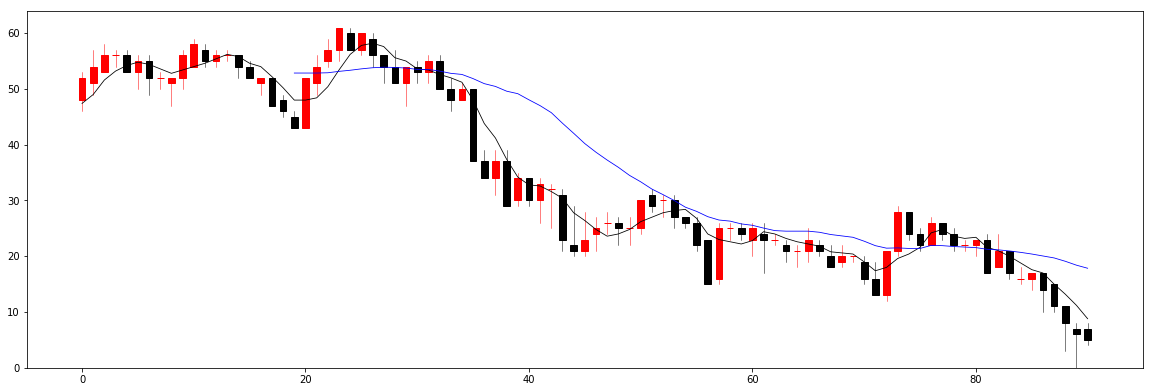

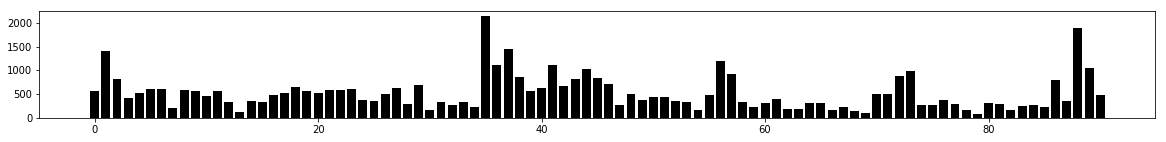

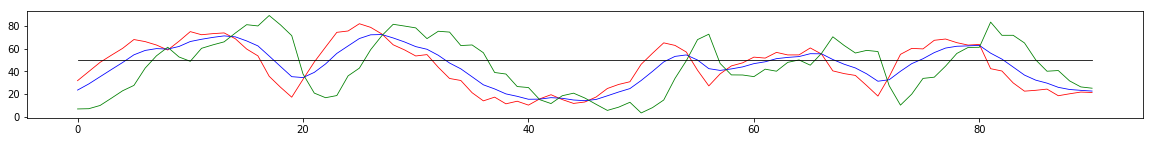

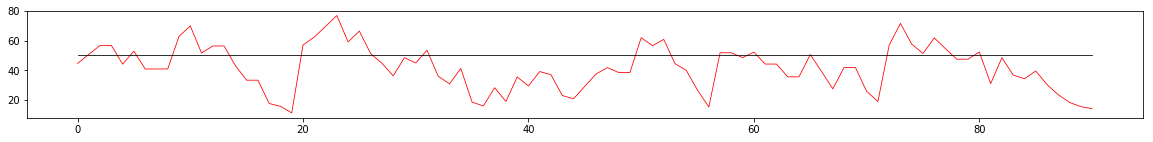

2018/8/1 -2.5


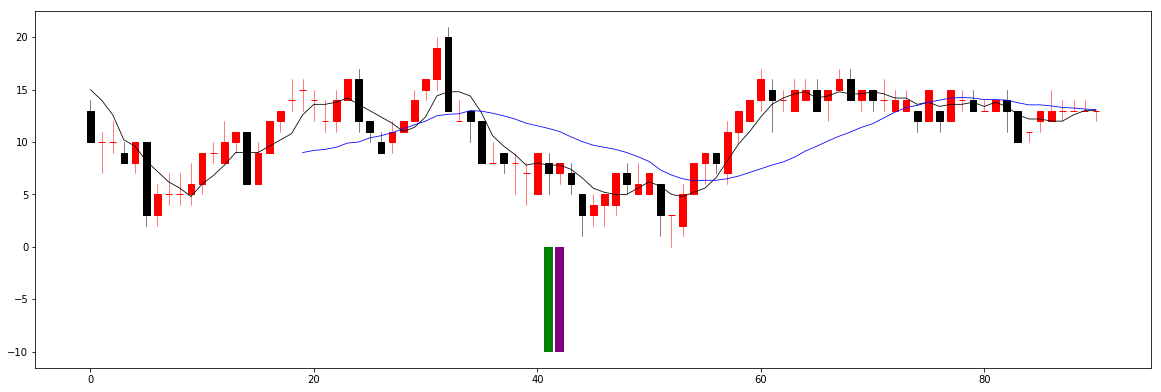

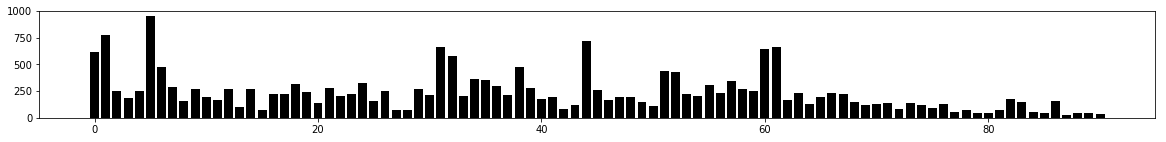

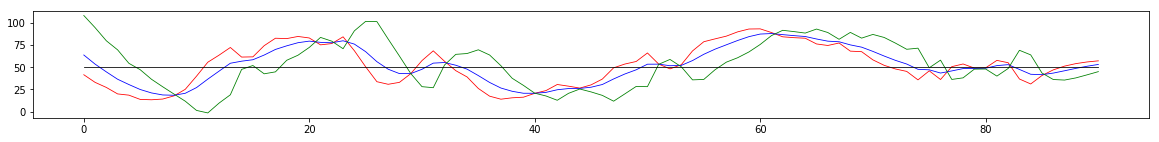

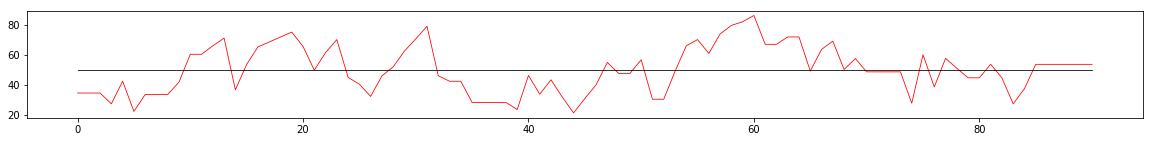

2018/7/31 0


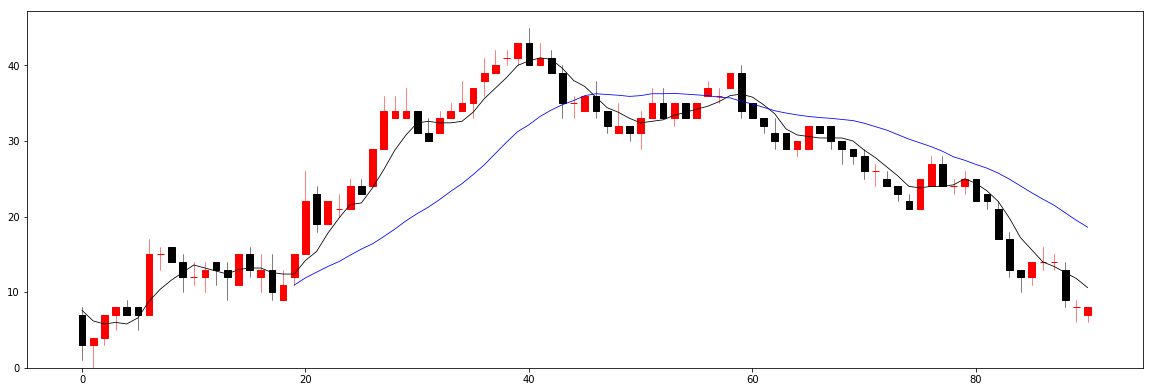

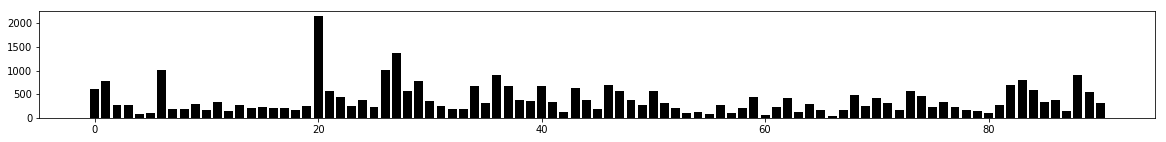

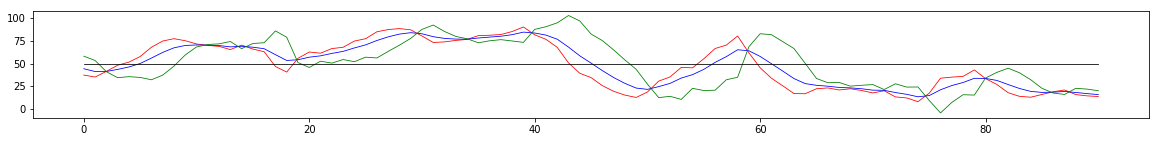

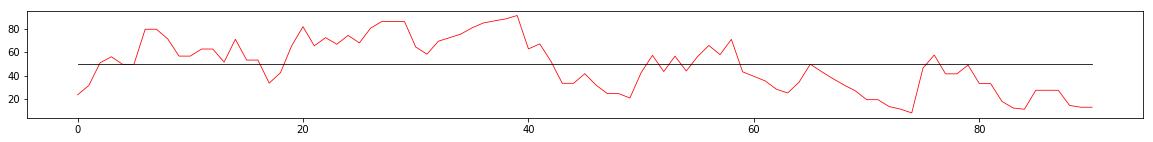

2018/7/30 0


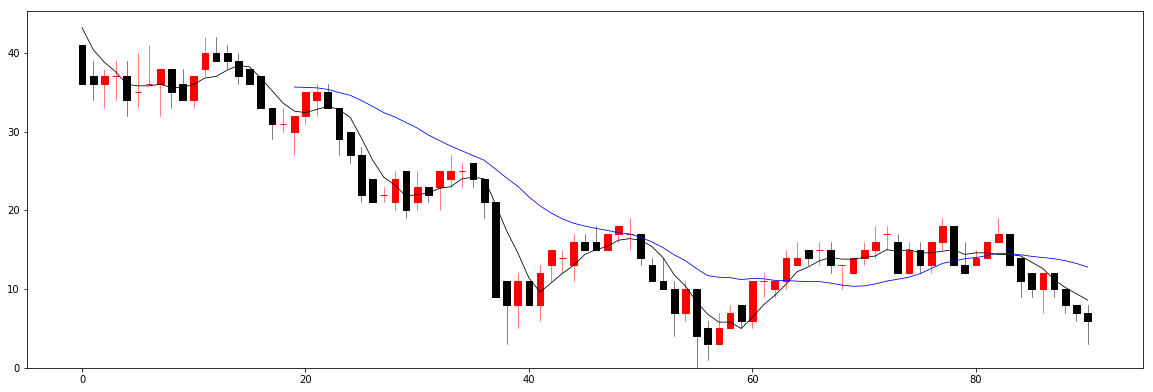

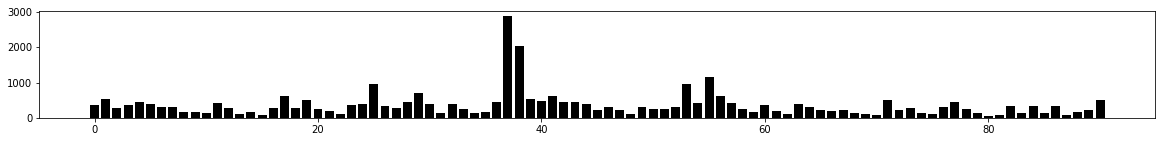

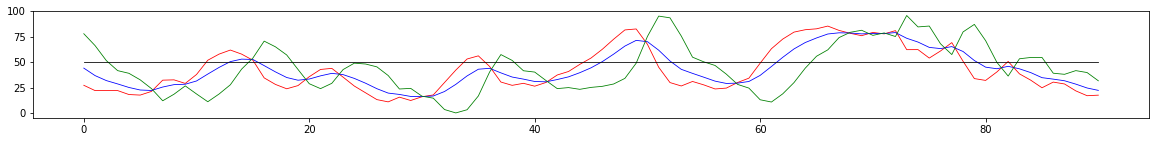

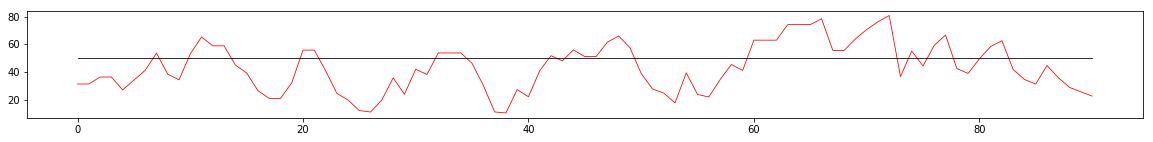

2018/7/27 0


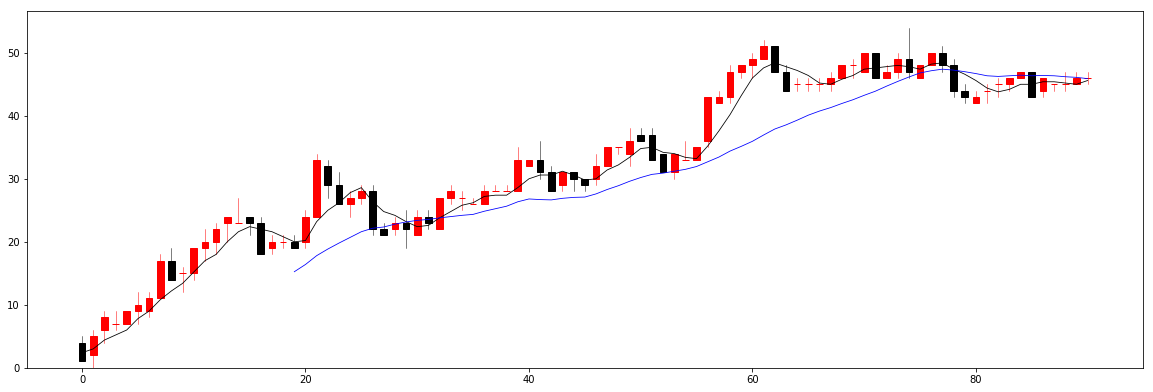

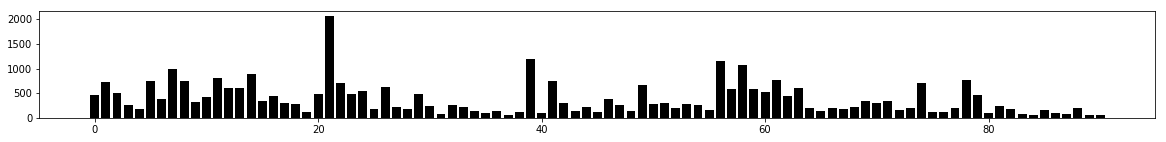

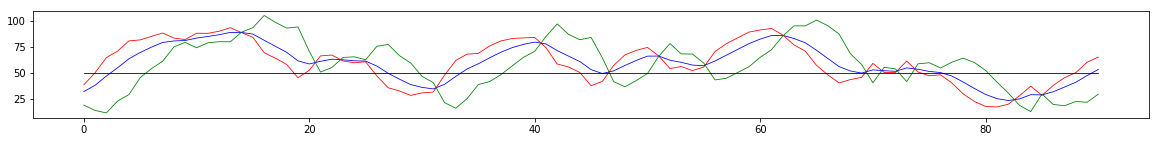

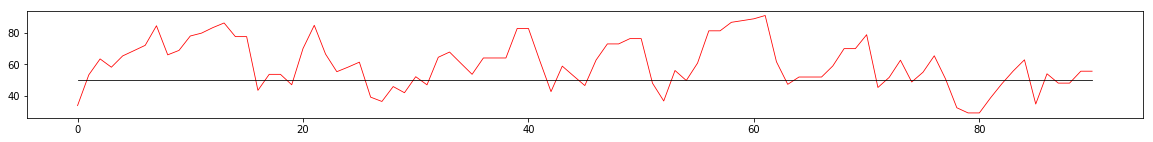

2018/7/26 0


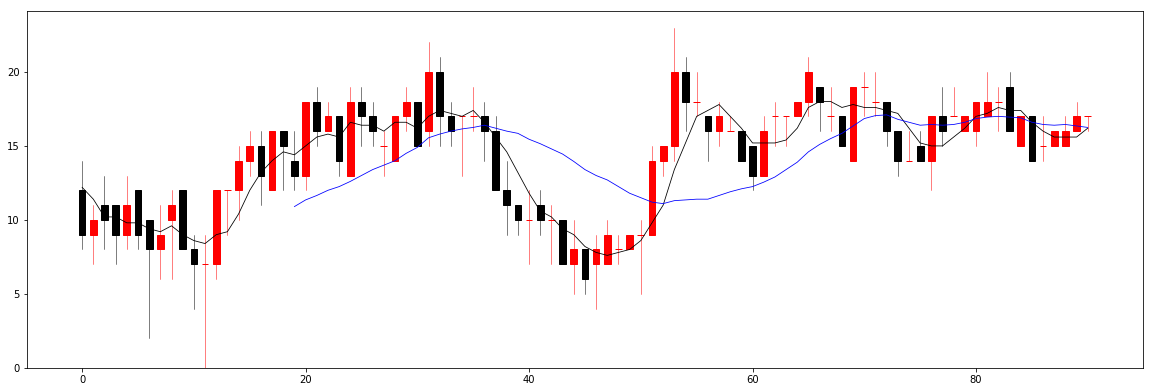

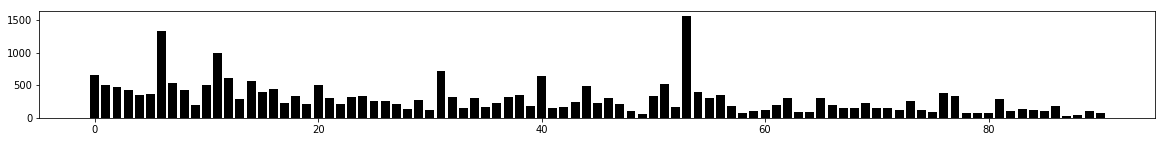

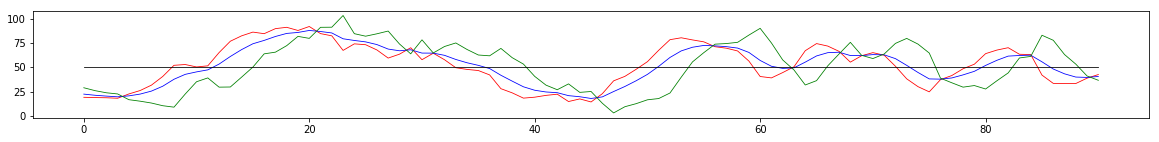

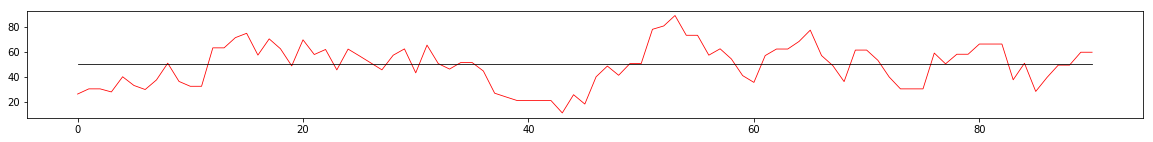

2018/7/25 0


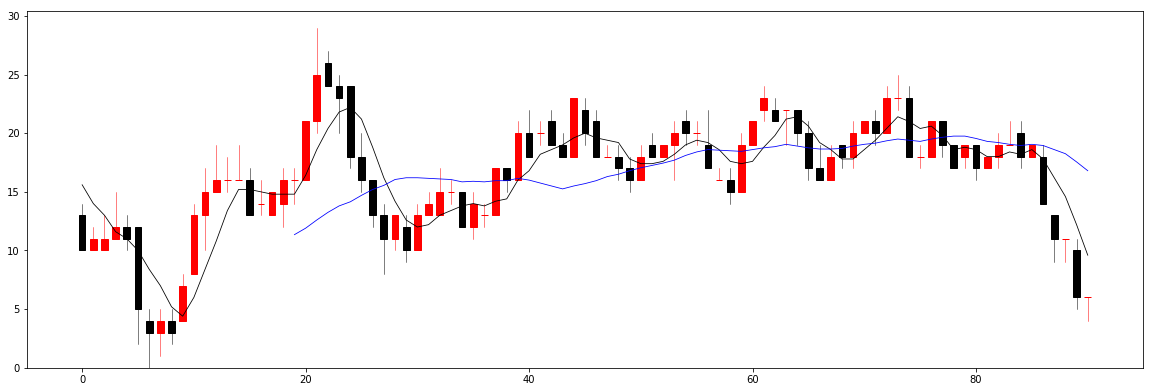

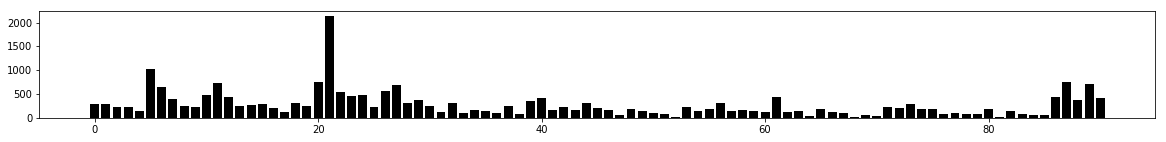

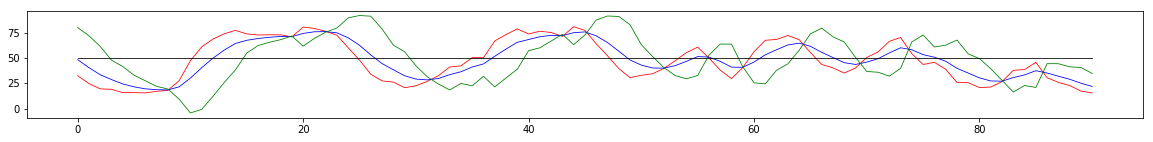

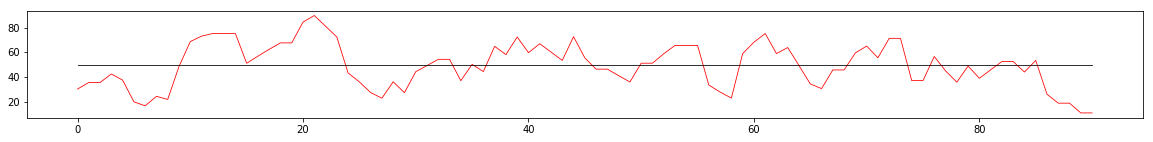

2018/7/24 0


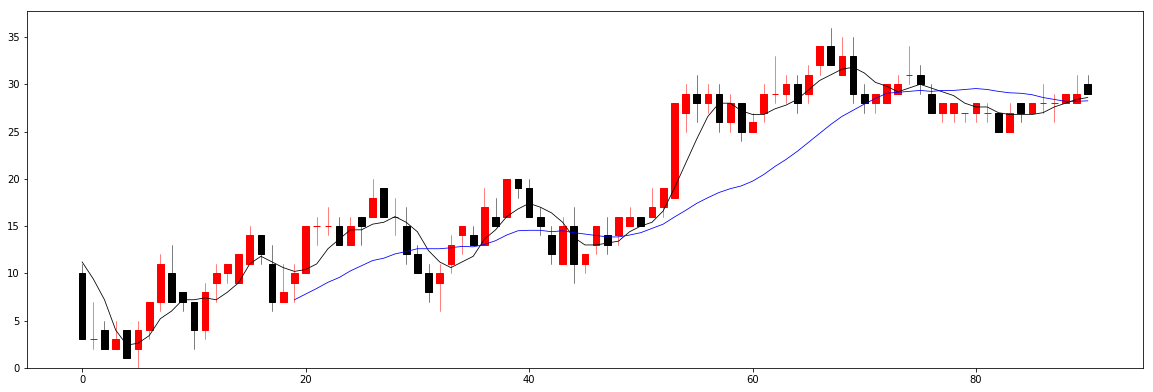

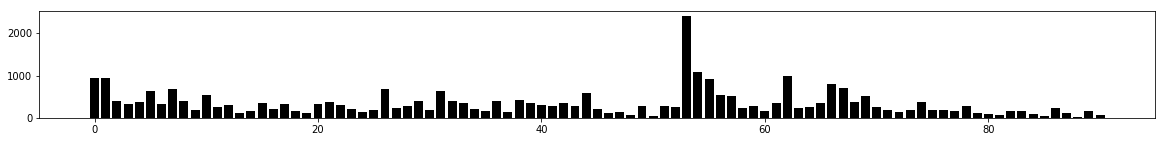

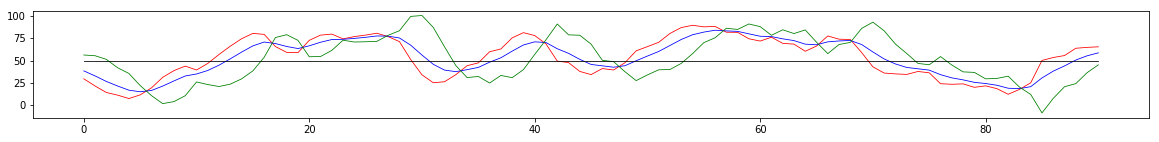

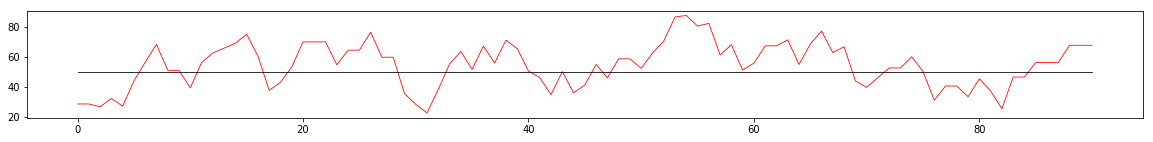

2018/7/23 0


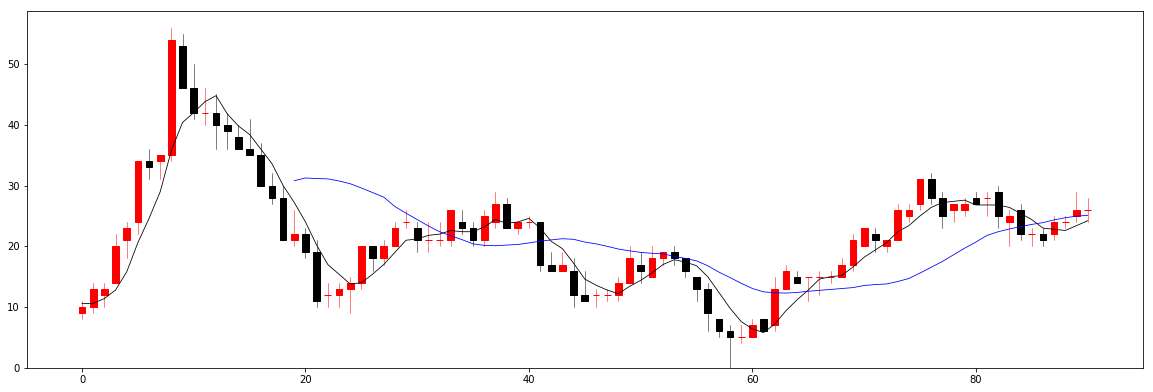

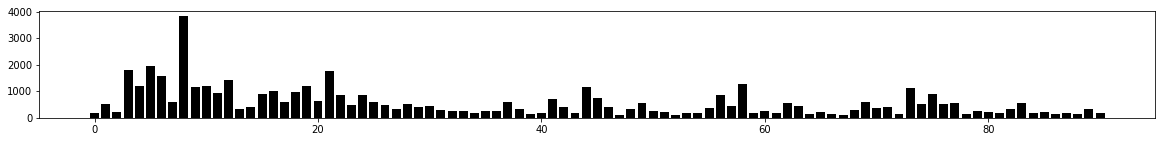

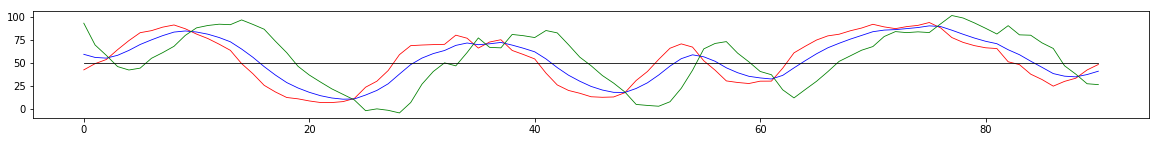

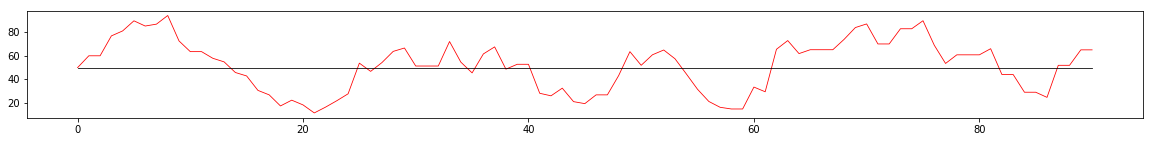

2018/7/20 0


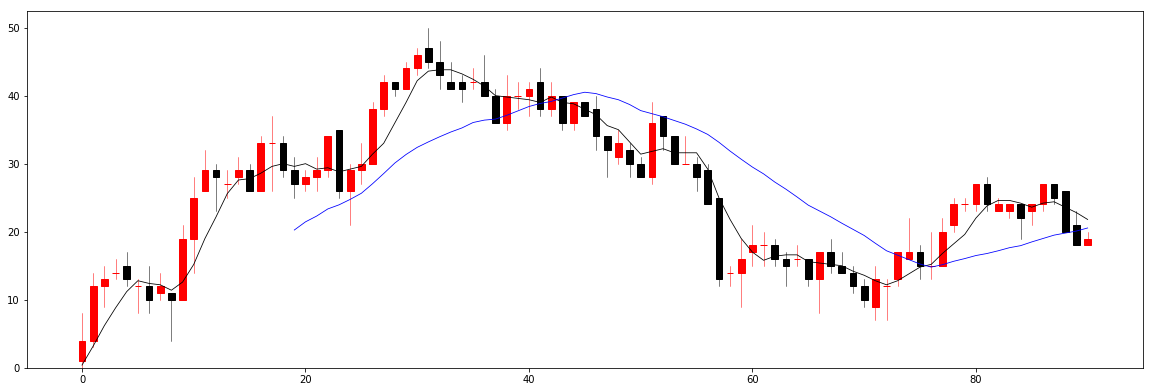

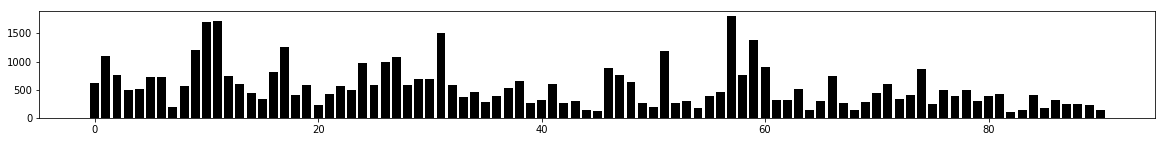

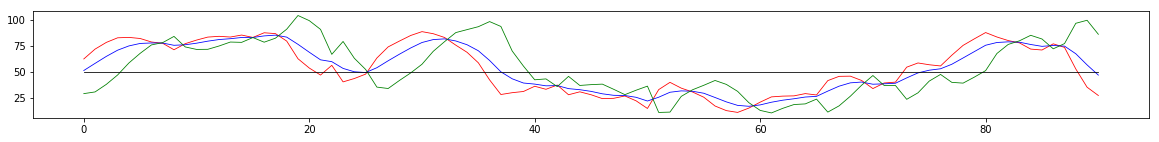

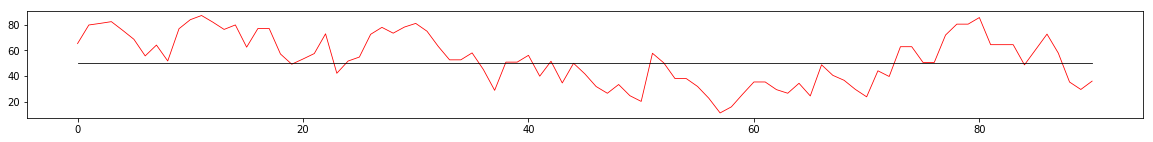

2018/7/19 0


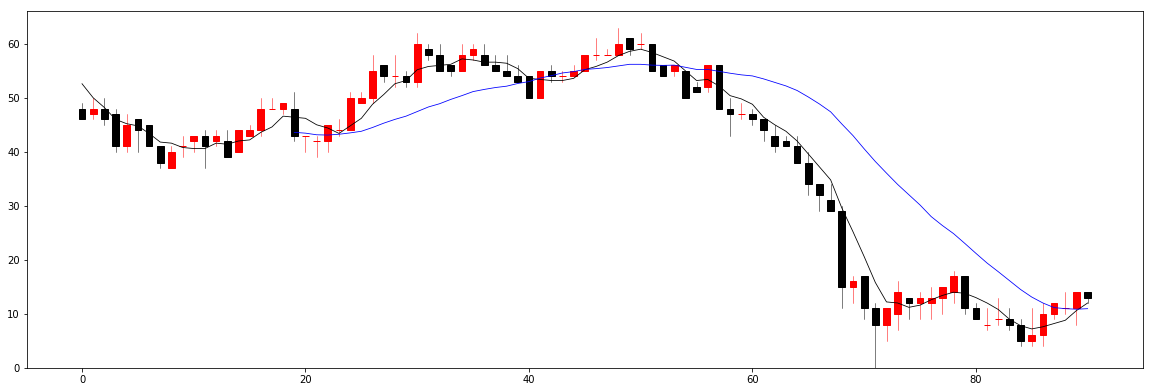

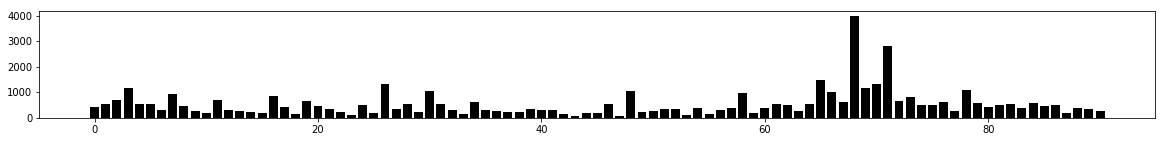

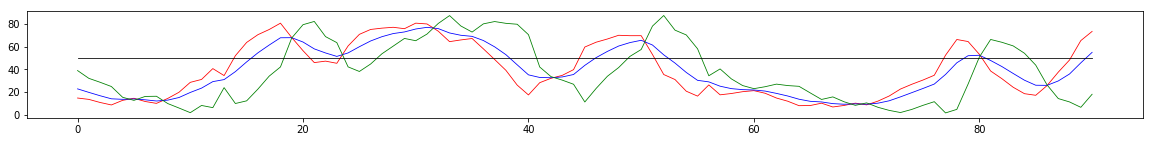

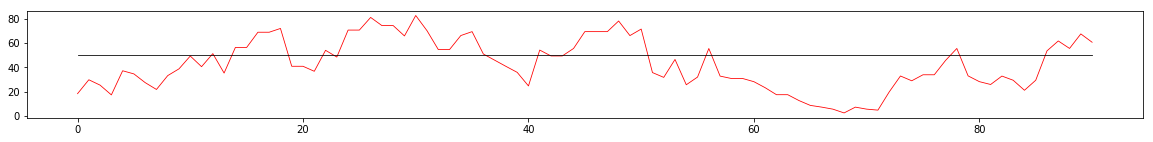

2018/7/18 0


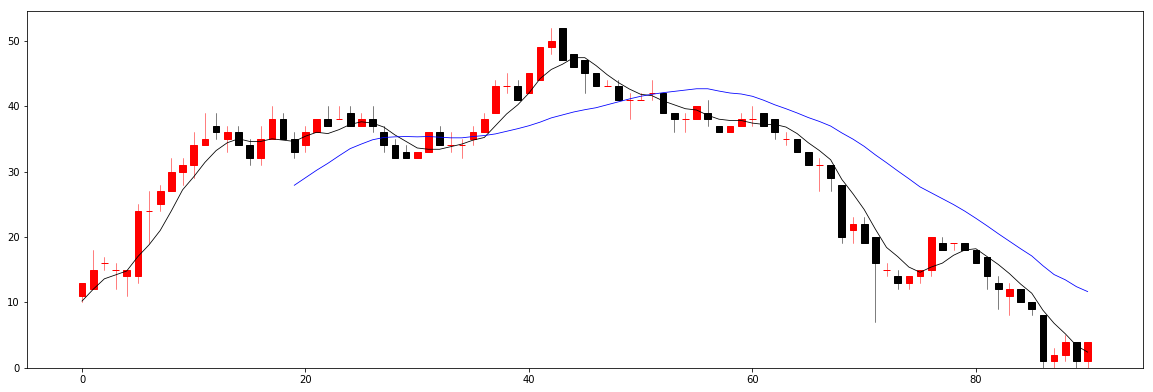

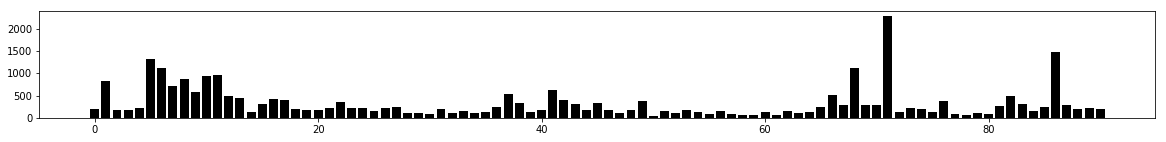

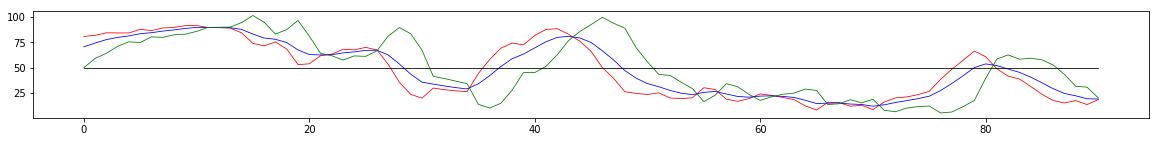

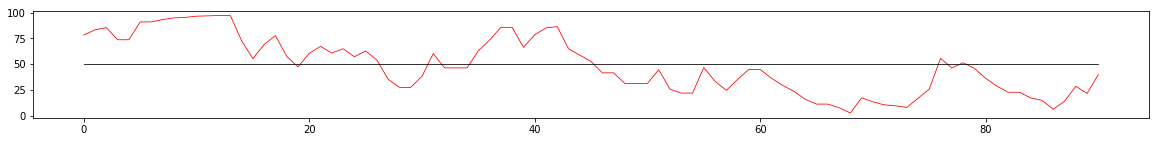

((0, 0, 0, 0), (-3.98, -225.0, 375.0, 6, 6))


NameError: global name 'is_print' is not defined

In [6]:
eval(days, buy_func='KD_GC', sell_func='KD_DC')
# eval(days, buy_func='KD_GC', sell_func='KD_Dec')
# eval(days, buy_func='KD_GC', sell_func='MA5_Dec')